In [300]:
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Se define la ruta para el directorio de datos sin procesar
path_data = Path.cwd().parent / 'data' / 'raw'

In [3]:
# Se carga los archivos csv
promotions_raw = pd.read_csv(path_data / "promotions.csv")
customers_raw = pd.read_csv(path_data / "customers.csv")
customer_labels_raw = pd.read_csv(path_data / "customer_labels.csv")
products_raw = pd.read_csv(path_data / "products.csv")
stores_raw = pd.read_csv(path_data / "stores.csv")
inventory_raw = pd.read_csv(path_data / "inventory.csv")
transactions_raw = pd.read_csv(path_data / "transactions.csv")

In [4]:
# Se genera copia de los dfs cargados originalmente
promotions = promotions_raw.copy()
customers = customers_raw.copy()
customer_labels = customer_labels_raw.copy()
products = products_raw.copy()
stores = stores_raw.copy()
inventory = inventory_raw.copy()
transactions = transactions_raw.copy()

# Info general df

In [5]:
def info_df(df):
    print("Dimension: ", df.shape)
    for col in df.columns:
        print("Valores unicos de", col, ":", df[col].nunique())
    print("-"*40)
    print("Valores Nulos:")
    print(df.isna().sum())
    print("-"*40)
    print(df.head())
    print("-"*40)
    print(df.info())
    print("-"*40)
    print(df.describe(include="all").T)
    print("#"*40)

In [6]:
info_df(promotions)

Dimension:  (220, 6)
Valores unicos de promo_id : 220
Valores unicos de sku : 192
Valores unicos de canal : 3
Valores unicos de descuento_pct : 189
Valores unicos de fecha_inicio : 182
Valores unicos de fecha_fin : 177
----------------------------------------
Valores Nulos:
promo_id         0
sku              0
canal            0
descuento_pct    0
fecha_inicio     0
fecha_fin        0
dtype: int64
----------------------------------------
  promo_id        sku canal  descuento_pct fecha_inicio   fecha_fin
0   PR3000  SKU100429   web           26.2   2025-02-01  2025-02-19
1   PR3001  SKU100355   app           43.0   2024-10-14  2024-12-07
2   PR3002  SKU100034   app           52.2   2024-03-27  2024-03-31
3   PR3003  SKU100033   web           27.4   2025-09-04  2025-10-18
4   PR3004  SKU100361   app           43.4   2025-02-19  2025-04-05
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #  

In [7]:
info_df(customers)

Dimension:  (20000, 5)
Valores unicos de customer_id : 20000
Valores unicos de ciudad : 20
Valores unicos de canal_preferido : 4
Valores unicos de edad : 56
Valores unicos de fecha_registro : 669
----------------------------------------
Valores Nulos:
customer_id        0
ciudad             0
canal_preferido    0
edad               0
fecha_registro     0
dtype: int64
----------------------------------------
  customer_id      ciudad canal_preferido  edad fecha_registro
0     C200000  Valledupar             web    33     2024-03-26
1     C200001       Pasto             web    46     2024-10-20
2     C200002  Valledupar          tienda    28     2025-07-14
3     C200003    Montería             web    34     2025-01-25
4     C200004   Cartagena          tienda    50     2024-08-01
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------      

In [8]:
info_df(customer_labels)

Dimension:  (20000, 2)
Valores unicos de customer_id : 20000
Valores unicos de label_recompra_90d : 2
----------------------------------------
Valores Nulos:
customer_id           0
label_recompra_90d    0
dtype: int64
----------------------------------------
  customer_id  label_recompra_90d
0     C200000                   0
1     C200001                   0
2     C200002                   1
3     C200003                   0
4     C200004                   0
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         20000 non-null  object
 1   label_recompra_90d  20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None
----------------------------------------
                      count unique      top freq     mean       std  min  25%  \
customer_id     

In [9]:
info_df(products)

Dimension:  (800, 8)
Valores unicos de sku : 800
Valores unicos de descripcion : 800
Valores unicos de categoria : 8
Valores unicos de subcategoria : 24
Valores unicos de impermeable : 2
Valores unicos de capacidad_litros : 7
Valores unicos de precio_lista : 800
Valores unicos de margen : 41
----------------------------------------
Valores Nulos:
sku                 0
descripcion         0
categoria           0
subcategoria        0
impermeable         0
capacidad_litros    0
precio_lista        0
margen              0
dtype: int64
----------------------------------------
         sku descripcion   categoria subcategoria  impermeable  \
0  SKU100000  Producto 1       Hogar       Cocina            0   
1  SKU100001  Producto 2    Infantil     Juguetes            0   
2  SKU100002  Producto 3        Moda       Hombre            0   
3  SKU100003  Producto 4       Hogar   Decoración            0   
4  SKU100004  Producto 5  Accesorios       Bolsos            0   

   capacidad_litros  pre

In [10]:
info_df(stores)

Dimension:  (150, 3)
Valores unicos de tienda_id : 150
Valores unicos de nombre : 150
Valores unicos de ciudad : 20
----------------------------------------
Valores Nulos:
tienda_id    0
nombre       0
ciudad       0
dtype: int64
----------------------------------------
  tienda_id    nombre     ciudad
0     S1000  Tienda 1  Sincelejo
1     S1001  Tienda 2  Florencia
2     S1002  Tienda 3      Neiva
3     S1003  Tienda 4     Ibagué
4     S1004  Tienda 5    Pereira
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tienda_id  150 non-null    object
 1   nombre     150 non-null    object
 2   ciudad     150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None
----------------------------------------
          count unique       top freq
tienda_id   150    150     S1000    1
nombre      150    150  Tiend

In [11]:
info_df(inventory)

Dimension:  (37500, 4)
Valores unicos de tienda_id : 150
Valores unicos de sku : 800
Valores unicos de stock : 36
Valores unicos de fecha_stock : 670
----------------------------------------
Valores Nulos:
tienda_id      0
sku            0
stock          0
fecha_stock    0
dtype: int64
----------------------------------------
  tienda_id        sku  stock fecha_stock
0     S1075  SKU100674     15  2024-09-08
1     S1046  SKU100114     26  2025-10-17
2     S1036  SKU100732     16  2024-10-23
3     S1111  SKU100148     22  2024-04-05
4     S1045  SKU100076     26  2024-07-26
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tienda_id    37500 non-null  object
 1   sku          37500 non-null  object
 2   stock        37500 non-null  int64 
 3   fecha_stock  37500 non-null  object
dtypes: int64(1), object(

In [12]:
info_df(transactions)

Dimension:  (100168, 8)
Valores unicos de transaccion_id : 100168
Valores unicos de customer_id : 19868
Valores unicos de fecha : 670
Valores unicos de sku : 800
Valores unicos de tienda_id : 150
Valores unicos de cantidad : 5
Valores unicos de precio_unitario : 98440
Valores unicos de canal : 4
----------------------------------------
Valores Nulos:
transaccion_id     0
customer_id        0
fecha              0
sku                0
tienda_id          0
cantidad           0
precio_unitario    0
canal              0
dtype: int64
----------------------------------------
  transaccion_id customer_id       fecha        sku tienda_id  cantidad  \
0        T500000     C209455  2025-02-15  SKU100009     S1006         1   
1        T500001     C200394  2024-11-02  SKU100279     S1090         1   
2        T500002     C207103  2025-05-24  SKU100307     S1073         2   
3        T500003     C208989  2024-06-14  SKU100402     S1047         1   
4        T500004     C205544  2024-12-13  SKU10051

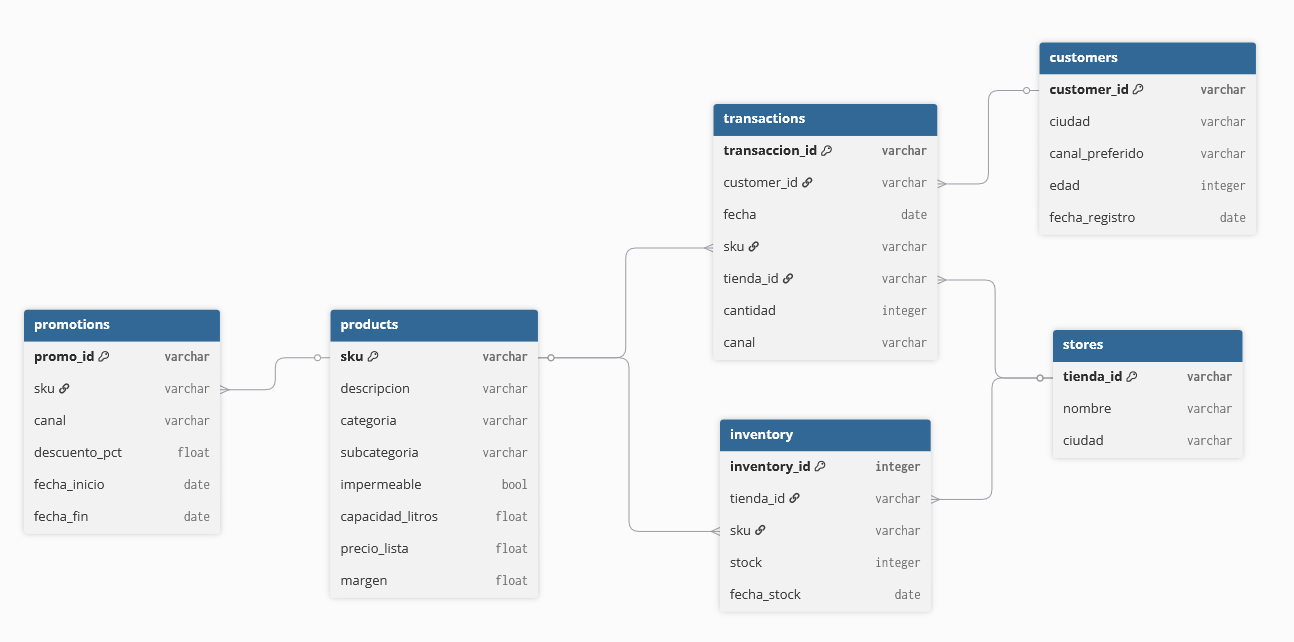

# Exploración de los datos

In [13]:
f"Transacciones totales: {transactions.shape[0]:,.0f}."

'Transacciones totales: 100,168.'

In [14]:
f"Promedio de transacciones por día: {transactions["fecha"].value_counts().mean():,.0f}."

'Promedio de transacciones por día: 150.'

## Gráficas

In [15]:
ciudades, conteos = np.unique(customers["ciudad"], return_counts=True)
customers["customers_por_ciudad"] = customers["ciudad"].map(dict(zip(ciudades, conteos)))

canales, conteos = np.unique(customers["canal_preferido"], return_counts=True)
customers["customers_por_canal"] = customers["canal_preferido"].map(dict(zip(canales, conteos)))

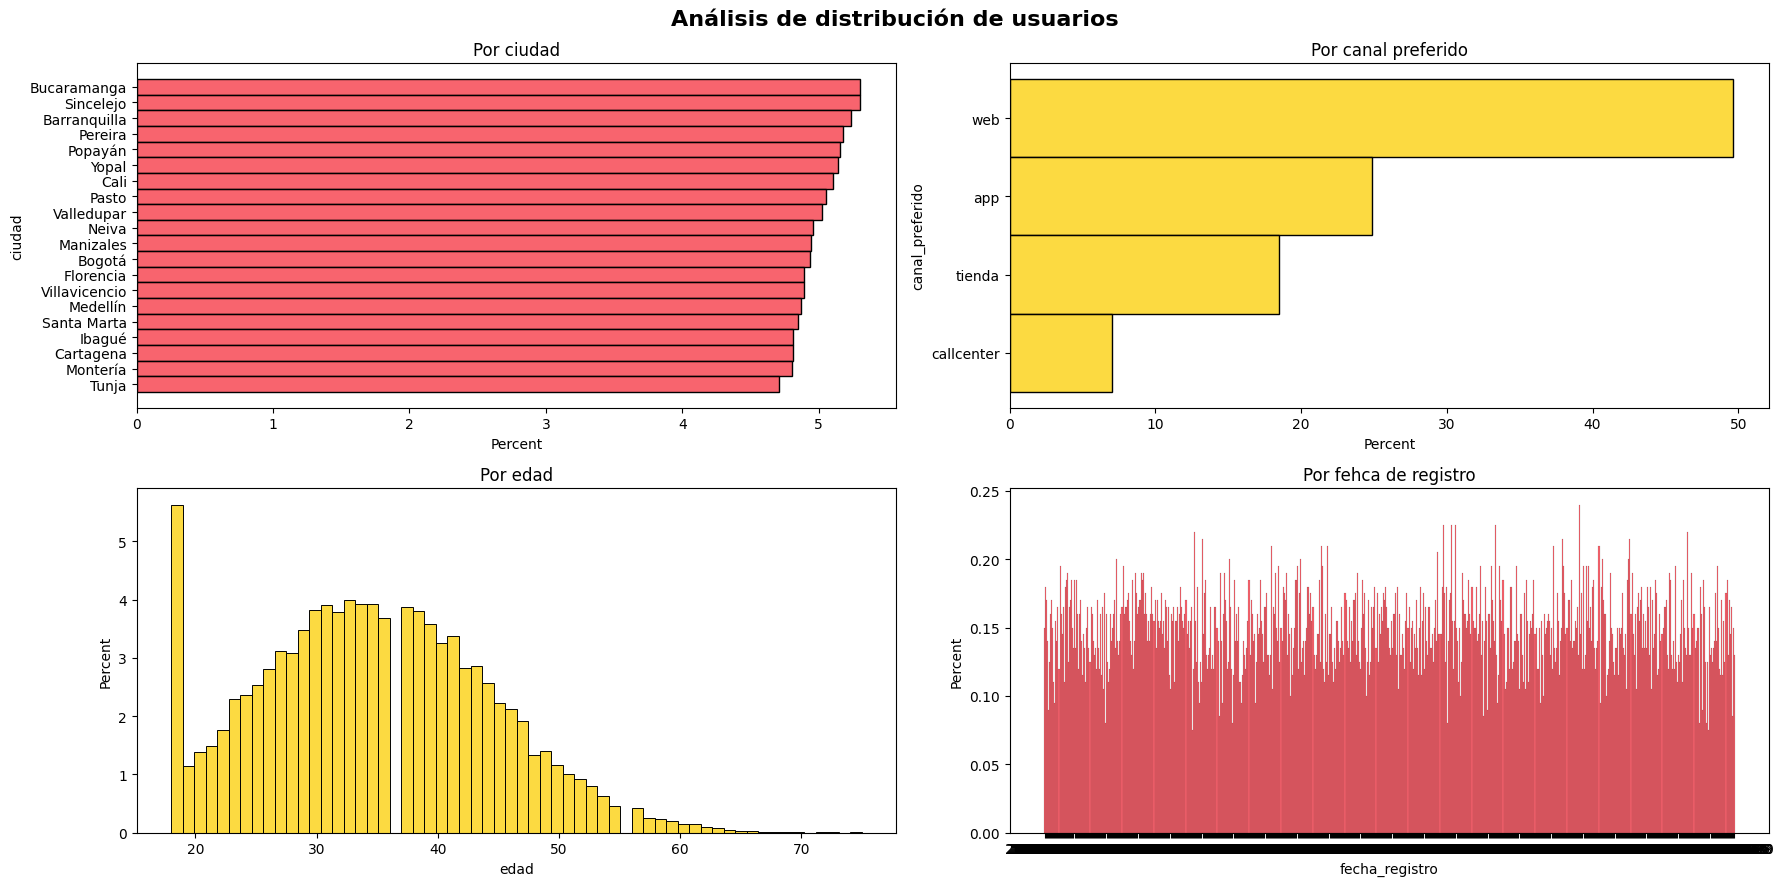

In [16]:
fig, ax = plt.subplots(2 , 2, figsize=(18,9))

# Usuarios por ciudad
sns.histplot(data=customers.sort_values("customers_por_ciudad", ascending=False), 
             y="ciudad", 
             ax=ax[0,0],
             color="#f6303e",
             stat="percent")
ax[0,0].set_title("Por ciudad")

# Usuarios por canal
sns.histplot(data=customers.sort_values("customers_por_canal", ascending=False), 
             y="canal_preferido", 
             ax=ax[0,1],
             color="#fcce01",
             stat="percent")
ax[0,1].set_title("Por canal preferido")

# Usuarios por edad
sns.histplot(data=customers.sort_values("edad"), 
             x="edad", 
             ax=ax[1,0],
             color="#fcce01",
             stat="percent")
ax[1,0].set_title("Por edad")

# Usuarios por canal
sns.histplot(data=customers.sort_values("fecha_registro"), 
             x="fecha_registro", 
             ax=ax[1,1],
             color="#f6303e",
             stat="percent")
ax[1,1].set_title("Por fehca de registro")

# Título general
fig.suptitle("Análisis de distribución de usuarios", fontsize=16, fontweight="bold")


plt.tight_layout()
plt.show()

In [17]:
canales, conteos = np.unique(transactions["canal"], return_counts=True)
transactions["transactions_por_canal"] = transactions["canal"].map(dict(zip(canales, conteos)))

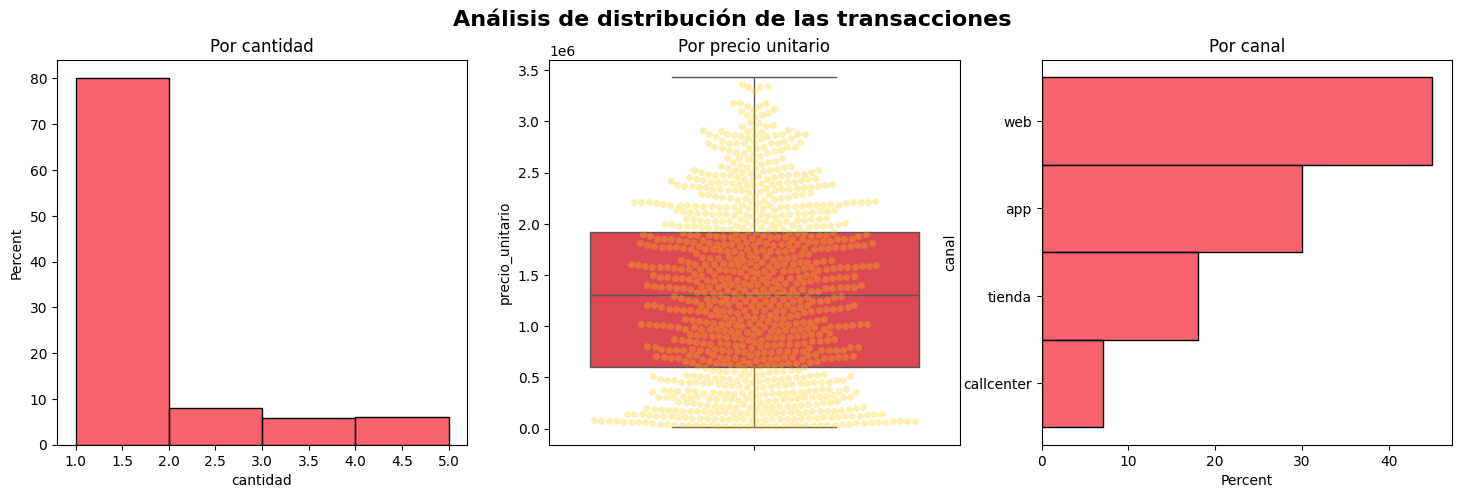

In [18]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(
    data=transactions,
    x="cantidad",
    color="#f6303e",
    bins=4,
    stat="percent",
    ax=ax[0]
)
ax[0].set_title("Por cantidad")

# Otro
sns.boxplot(
    data=transactions,
    y="precio_unitario",
    color="#f6303e",
    ax=ax[1]
)

sns.swarmplot(
    data=transactions.sample(1000),
    y="precio_unitario",
    color="#fcce01",
    alpha=0.3,
    ax=ax[1]
)

ax[1].set_title("Por precio unitario")

# Otro
sns.histplot(
    data=transactions.sort_values("transactions_por_canal", ascending=False),
    y="canal",
    color="#f6303e",
    bins=4,
    stat="percent",
    ax=ax[2]
)
ax[2].set_title("Por canal")

# Título general

fig.suptitle("Análisis de distribución de las transacciones", fontsize=16, fontweight="bold")

plt.show()

# Reducción de columnas

In [19]:
try:
    products = products.drop('descripcion', axis=1)
    stores = stores.drop('nombre', axis=1)
except KeyError: pass

# Generación de Features

In [20]:
promotions["fecha_inicio"] = pd.to_datetime(promotions["fecha_inicio"])
promotions["fecha_fin"] = pd.to_datetime(promotions["fecha_fin"])
promotions["duracion"] = promotions["fecha_fin"] - promotions["fecha_inicio"]

In [21]:
transactions["total_pagado"] = transactions["precio_unitario"] * transactions["cantidad"]

- Se quiere identificar en la tabla de `transactions` la transacción registrada fue de una promoción.
- Se quiere generar un indice de RMF para intentar segmentar los clientes.

In [22]:
transactions.shape

(100168, 10)

In [23]:
def es_promo(sku, fecha):
    fecha = pd.to_datetime(fecha)
    promotions_temp = promotions.loc[promotions["sku"] == sku, ["fecha_inicio", "fecha_fin", "descuento_pct"]]
    descuento_pct = promotions_temp.loc[(
        (promotions_temp["fecha_inicio"] <= fecha) &
        (promotions_temp["fecha_fin"] >= fecha)
    ), ["descuento_pct"]]

    if descuento_pct.shape[0] == 1:
        return 1 , descuento_pct.values[0, 0]
    else:
        return 0 , 0

In [24]:
transactions[["es_promo", "descuento_pct"]] = transactions.apply(lambda df: es_promo(df["sku"], df["fecha"]), axis=1, result_type='expand')

In [25]:
transactions.shape

(100168, 12)

In [26]:
print(f"{100 * transactions.es_promo.sum() / len(transactions):,.2f}% de transacciones con descuentos.")

1.25% de transacciones con descuentos.


In [27]:
# Se actualiza el valor pagado considerando la información de las promociones
transactions["total_pagado"] = transactions["total_pagado"] * ((100 - transactions["descuento_pct"]) / 100)

## RMF

- **Recency (R):** Qué tan renciente fue la última compra de un cliente.
- **Frequency (F):** Cuántas veces ha comprado en un período determinado.
- **Monetary (M):** Cuánto dinero ha gastado en total.

In [28]:
transactions["fecha"] = pd.to_datetime(transactions["fecha"])

In [29]:
info_customer_transactions = transactions.groupby("customer_id").agg(
    recency=("fecha", "max"),
    frequency=("sku", "count"),
    monetary=("total_pagado", "sum"),
    promo=("es_promo", "sum")
).reset_index()
info_customer_transactions['recency'] = transactions['fecha'].max() - info_customer_transactions['recency']

In [30]:
info_customer_transactions.head()

,customer_id,recency,frequency,monetary,promo
0,C200000,95 days,6,1.136249e+07,0.0
1,C200001,9 days,6,1.083240e+07,0.0
2,C200002,1 days,3,3.012146e+06,1.0
3,C200003,79 days,7,8.986518e+06,0.0
4,C200004,70 days,5,7.962296e+06,2.0


### Recency (R)

In [31]:
# Se identifca la frecuencia de la cantidad de días que demora un cliente para volver a hacer otra compra
day_diff = list()
transactions = transactions.sort_values(["customer_id", "fecha"]).reset_index(drop=True)
customer_0 = transactions.loc[0, "customer_id"]
for row in range(transactions.shape[0] - 1):
    df_temp = transactions.loc[[row, row + 1], ["customer_id", "fecha"]].copy()
    df_temp = df_temp.reset_index(drop=True)
    if df_temp.loc[1, "customer_id"] == customer_0:
        days = df_temp["fecha"].diff()[1].days
        if days > 0: day_diff.append(days)
    customer_0 = df_temp.loc[1, "customer_id"]

In [32]:
unicos, cantidad = np.unique(day_diff, return_counts=True)

In [33]:
# Se identifican los percentiles 25 y 75
np.quantile(day_diff, q=0.25) , np.quantile(day_diff, q=0.75)

(np.float64(31.0), np.float64(144.0))

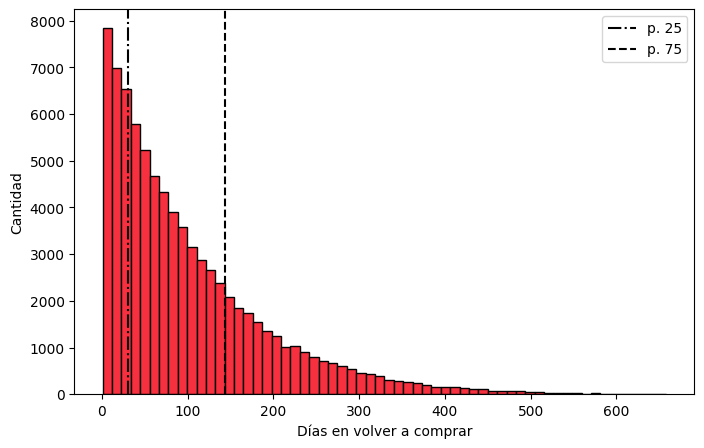

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(day_diff, edgecolor="black", color="#f6303e", bins=60)
plt.axvline(31, c="black", ls="-.", label="p. 25")
plt.axvline(144, c="black", ls="--", label="p. 75")
plt.xlabel("Días en volver a comprar")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

De acuerdo a la frecuencia de la cantidad de días que se tarda un cliente en volver a realizar una compra, se identifican los percentiles 25 ($Q(25)=31$) y 75 ($Q(75)=144$).

Para identificar **Recency (R)** se consideran tres categorías a partir de los percentiles:

|Categoría | Días desde la ultima compra |  Puntos |
|----------|--------------|-----------|
|RA (Tiempo reciente) | menos de 31 días |  3 |
| RB (Tiempo medio) | entre 31 y 144 días | 2 |
| RC (Tiempo lejano) | más de 144 días | 1 |



In [41]:
def recency(recency):
    if recency < pd.Timedelta(days=31):
        return "RA"
    elif recency <= pd.Timedelta(days=144):
        return "RB"
    else:
        return "RC"

In [42]:
info_customer_transactions["R"] = info_customer_transactions["recency"].apply(recency)

### Frequency (F)

In [49]:
np.quantile(info_customer_transactions["frequency"].values, q=0.25) , np.quantile(info_customer_transactions["frequency"].values, q=0.75)

(np.float64(3.0), np.float64(6.0))

In [162]:
info_customer_transactions["frequency"].nunique()

16

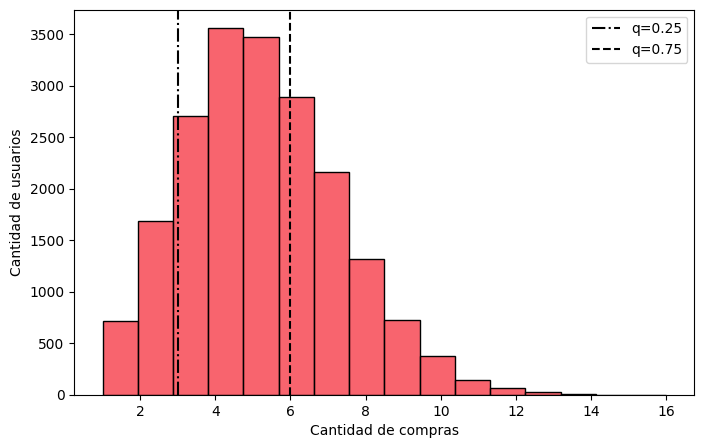

In [163]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=info_customer_transactions, x="frequency", color="#f6303e", bins=16, ax=ax)
plt.axvline(np.quantile(info_customer_transactions["frequency"].values, q=0.25), color="black", ls="-.", label="q=0.25")
plt.axvline(np.quantile(info_customer_transactions["frequency"].values, q=0.75), color="black", ls="--", label="q=0.75")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Cantidad de compras")
plt.legend()
plt.show()

Para indentificar **Frequency (F)** se consideran tres categorias a partir de los percentiles 25 y 75.

| Categoría | Cantidad de compras |Puntos|
|-----------|---------------------|------|
| FA        | 7 ó más compras     |3     |
| FB        | 3 a 6 compras       |2     |
| FC        | 2 ó menos compras   |1     |

In [51]:
np.quantile(info_customer_transactions["frequency"].values, q=0.25) , np.quantile(info_customer_transactions["frequency"].values, q=0.75)

(np.float64(3.0), np.float64(6.0))

In [52]:
def frequency(cantidad):
    if cantidad >= 7:
        return "FA"
    elif cantidad >= 3:
        return "FB"
    else:
        return "FC"

In [53]:
info_customer_transactions["F"] = info_customer_transactions["frequency"].apply(frequency)

### Monetary (M)

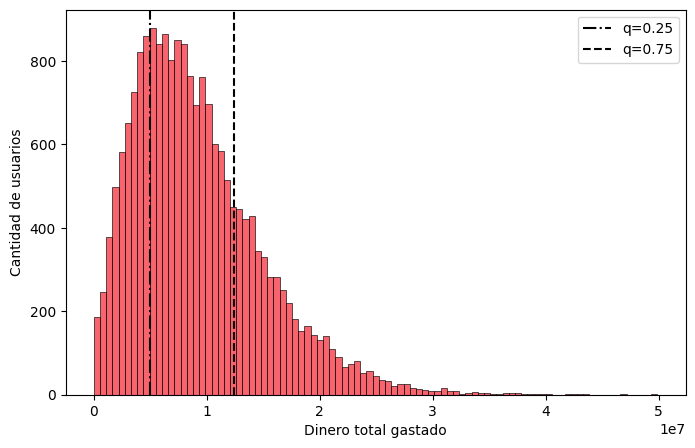

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=info_customer_transactions, x="monetary", color="#f6303e", ax=ax)
plt.axvline(np.quantile(info_customer_transactions["monetary"].values, q=0.25), c="black", ls="-.", label="q=0.25")
plt.axvline(np.quantile(info_customer_transactions["monetary"].values, q=0.75), c="black", ls="--", label="q=0.75")
plt.ylabel("Cantidad de usuarios")
plt.xlabel("Dinero total gastado")
plt.legend()
plt.show()

In [60]:
print(f"Q(0.25)= {np.quantile(info_customer_transactions["monetary"].values, q=0.25):,.1f}")
print(f"Q(0.75)= {np.quantile(info_customer_transactions["monetary"].values, q=0.75):,.1f}")

Q(0.25)= 4,973,040.2
Q(0.75)= 12,398,262.8


Para indentificar **Monetary (M)** se consideran tres categorias aproximando los percentiles 25 y 75.

| Categoría | Cantidad de compras   |Puntos|
|-----------|-----------------------|------|
| MA        | más de 12.4M          |3     |
| MB        | 5M a 12.4M            |2     |
| MC        | menos de 5M           |1     |

In [61]:
def monetary(total):
    if total >= 12.4e6:
        return "MA"
    elif total >= 5e6:
        return "MB"
    else:
        return "MC"

In [62]:
info_customer_transactions["M"] = info_customer_transactions["monetary"].apply(monetary)

### Puntaje RFM

In [164]:
info_customer_transactions["puntaje_R"] = info_customer_transactions["R"].map(dict(zip(["RA", "RB", "RC"], [1 ,2, 3])))
info_customer_transactions["puntaje_F"] = info_customer_transactions["F"].map(dict(zip(["FA", "FB", "FC"], [1 ,2, 3])))
info_customer_transactions["puntaje_M"] = info_customer_transactions["M"].map(dict(zip(["MA", "MB", "MC"], [1 ,2, 3])))
info_customer_transactions["Puntaje_RFM"] = info_customer_transactions["puntaje_R"] + info_customer_transactions["puntaje_F"] + info_customer_transactions["puntaje_M"]
info_customer_transactions["Puntaje_RFM_str"] = info_customer_transactions["Puntaje_RFM"].astype("str")

In [78]:
print(f"Q(0.25)= {np.quantile(info_customer_transactions["Puntaje_RFM"].values, q=0.25):,.1f}")
print(f"Q(0.75)= {np.quantile(info_customer_transactions["Puntaje_RFM"].values, q=0.75):,.1f}")

Q(0.25)= 5.0
Q(0.75)= 7.0


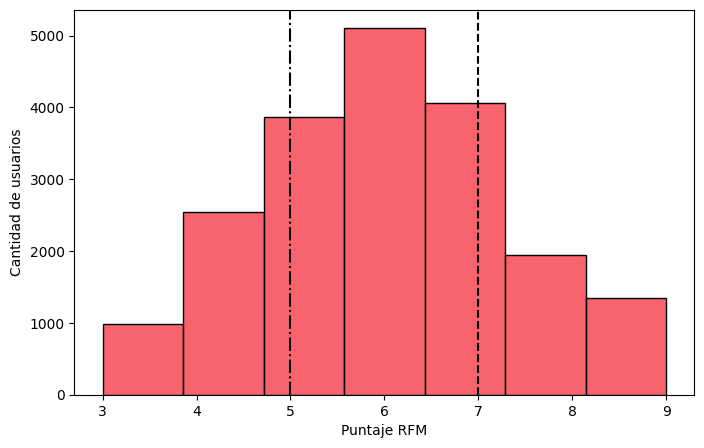

In [167]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=info_customer_transactions, color="#f6303e", x="Puntaje_RFM", ax=ax, bins=7)
plt.axvline(np.quantile(info_customer_transactions["Puntaje_RFM"].values, q=0.25), c="black", ls="-.", label="q=0.25")
plt.axvline(np.quantile(info_customer_transactions["Puntaje_RFM"].values, q=0.75), c="black", ls="--", label="q=0.75")
plt.xlabel("Puntaje RFM")
plt.ylabel("Cantidad de usuarios")
plt.show()

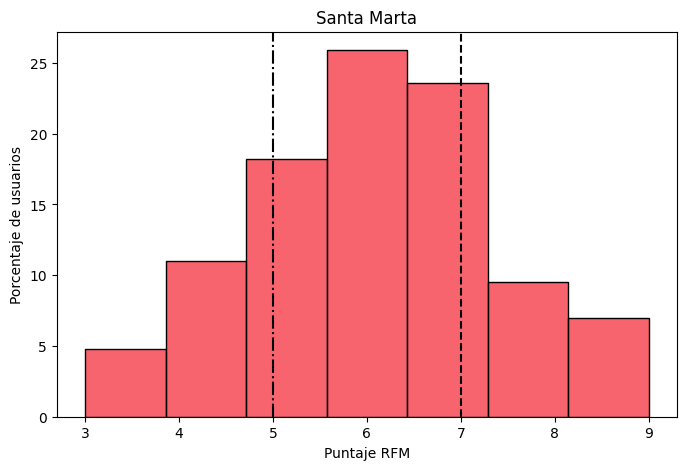

In [257]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=customers.loc[(customers["Puntaje_RFM"] > 0) & (customers["ciudad"] == "Santa Marta")], 
             color="#f6303e", 
             x="Puntaje_RFM", 
             ax=ax, 
             stat="percent", 
             bins=7)
plt.axvline(np.quantile(customers["Puntaje_RFM"].values, q=0.25), c="black", ls="-.", label="q=0.25")
plt.axvline(np.quantile(customers["Puntaje_RFM"].values, q=0.75), c="black", ls="--", label="q=0.75")
plt.xlabel("Puntaje RFM")
plt.ylabel("Porcentaje de usuarios")
plt.title("Santa Marta")
plt.show()

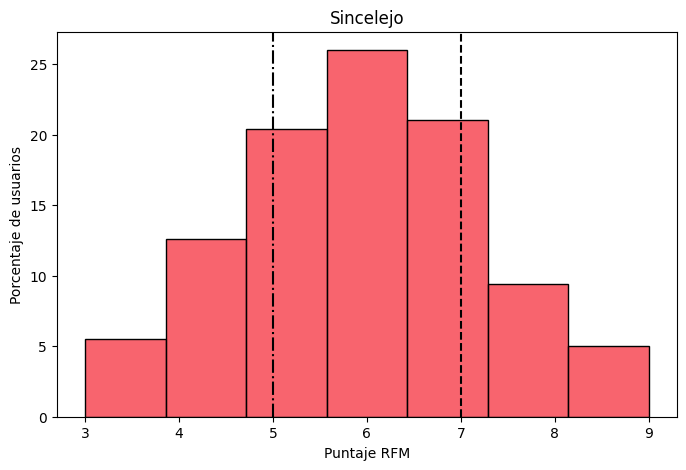

In [256]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=customers.loc[(customers["Puntaje_RFM"] > 0) & (customers["ciudad"] == "Sincelejo")], 
             color="#f6303e", 
             x="Puntaje_RFM", 
             ax=ax, 
             stat="percent", 
             bins=7)
plt.axvline(np.quantile(customers["Puntaje_RFM"].values, q=0.25), c="black", ls="-.", label="q=0.25")
plt.axvline(np.quantile(customers["Puntaje_RFM"].values, q=0.75), c="black", ls="--", label="q=0.75")
plt.xlabel("Puntaje RFM")
plt.ylabel("Porcentaje de usuarios")
plt.title("Sincelejo")
plt.show()

In [80]:
mean_rfm = info_customer_transactions["Puntaje_RFM"].mean()
dsta_rfm = info_customer_transactions["Puntaje_RFM"].std()
print(f"El puntaje RFM tiene una distribución normal con media: {mean_rfm:,.2f} y desviación estandar: {dsta_rfm:,.2f}.")

El puntaje RFM tiene una distribución normal con media: 6.00 y desviación estandar: 1.54.


In [81]:
customers = customers.merge(
    info_customer_transactions[["customer_id", "recency", "frequency", "monetary", "promo", "Puntaje_RFM"]],
    "left", "customer_id"
)
customers["Puntaje_RFM"] = customers["Puntaje_RFM"].fillna(0)

In [82]:
customers.shape

(20000, 12)

In [83]:
customers["Puntaje_RFM"] = customers["Puntaje_RFM"].astype("float")

In [240]:
ciudad_rfm = customers[customers["Puntaje_RFM"] > 0].groupby("ciudad").agg(
    ciudad_rfm_mean=("Puntaje_RFM", "mean"),
    cantidad=("Puntaje_RFM", "count"),
    ).reset_index().sort_values("ciudad_rfm_mean", ascending=False).reset_index(drop=True)
ciudad_rfm["freq"] = ciudad_rfm["cantidad"] / ciudad_rfm["cantidad"].sum()
ciudad_rfm["dif_mean"] = ciudad_rfm["ciudad_rfm_mean"] - ciudad_rfm["ciudad_rfm_mean"].mean()
ciudad_rfm["1 - freq"] = 1 - ciudad_rfm["freq"]
ciudad_rfm["coef"] = ciudad_rfm["dif_mean"] * ciudad_rfm["1 - freq"]
ciudad_rfm["coef_esca"] = (ciudad_rfm["coef"] - ciudad_rfm["coef"].min())/(ciudad_rfm["coef"].max() - ciudad_rfm["coef"].min())

In [241]:
ciudad_rfm

,ciudad,ciudad_rfm_mean,cantidad,freq,dif_mean,1 - freq,coef,coef_esca
0,Santa Marta,6.090909,957,0.048168,0.086344,0.951832,0.082185,1.000000
1,Manizales,6.070408,980,0.049326,0.065843,0.950674,0.062595,0.873443
2,Popayán,6.045809,1026,0.051641,0.041244,0.948359,0.039114,0.721744
3,Valledupar,6.044088,998,0.050232,0.039523,0.949768,0.037538,0.711561
4,Bogotá,6.043611,986,0.049628,0.039045,0.950372,0.037107,0.708782
5,Pasto,6.041833,1004,0.050534,0.037267,0.949466,0.035384,0.697648
6,Montería,6.028391,951,0.047866,0.023826,0.952134,0.022685,0.615610
7,Villavicencio,6.020513,975,0.049074,0.015947,0.950926,0.015165,0.567024
8,Pereira,6.006803,1029,0.051792,0.002237,0.948208,0.002121,0.482759
9,Florencia,6.005128,975,0.049074,0.000563,0.950926,0.000535,0.472511


In [258]:
canal_rfm = customers[customers["Puntaje_RFM"] > 0].groupby("canal_preferido").agg(
    canal_rfm_mean=("Puntaje_RFM", "mean"),
    cantidad=("Puntaje_RFM", "count"),
    ).reset_index().sort_values("canal_rfm_mean", ascending=False).reset_index(drop=True)
canal_rfm["freq"] = canal_rfm["cantidad"] / canal_rfm["cantidad"].sum()
canal_rfm["dif_mean"] = canal_rfm["canal_rfm_mean"] - canal_rfm["canal_rfm_mean"].mean()
canal_rfm["1 - freq"] = 1 - canal_rfm["freq"]
canal_rfm["coef"] = canal_rfm["dif_mean"] * canal_rfm["1 - freq"]
canal_rfm["coef_esca"] = (canal_rfm["coef"] - canal_rfm["coef"].min())/(canal_rfm["coef"].max() - canal_rfm["coef"].min())
canal_rfm

,canal_preferido,canal_rfm_mean,cantidad,freq,dif_mean,1 - freq,coef,coef_esca
0,tienda,6.018539,3668,0.184618,0.026289,0.815382,0.021436,1.000000
1,web,6.010236,9867,0.496628,0.017986,0.503372,0.009054,0.821650
2,app,5.999595,4935,0.248389,0.007345,0.751611,0.005521,0.770756
3,callcenter,5.940629,1398,0.070364,-0.051620,0.929636,-0.047988,0.000000


In [85]:
canal_rfm = customers[customers["Puntaje_RFM"] > 0].groupby("canal_preferido").agg(
    canal_preferido_rfm_mean=("Puntaje_RFM", "mean"),
    cantidad=("Puntaje_RFM", "count"),
    ).reset_index().sort_values("canal_preferido_rfm_mean", ascending=False).reset_index(drop=True)
canal_rfm["porc"] = canal_rfm["cantidad"] / canal_rfm["cantidad"].sum()
canal_rfm

,canal_preferido,canal_preferido_rfm_mean,cantidad,porc
0,tienda,6.018539,3668,0.184618
1,web,6.010236,9867,0.496628
2,app,5.999595,4935,0.248389
3,callcenter,5.940629,1398,0.070364


# Gráficas

In [149]:
customers["rfm_mean_ciudad"] = customers["ciudad"].map(dict(zip(ciudad_rfm["ciudad"], ciudad_rfm["ciudad_rfm_mean"])))

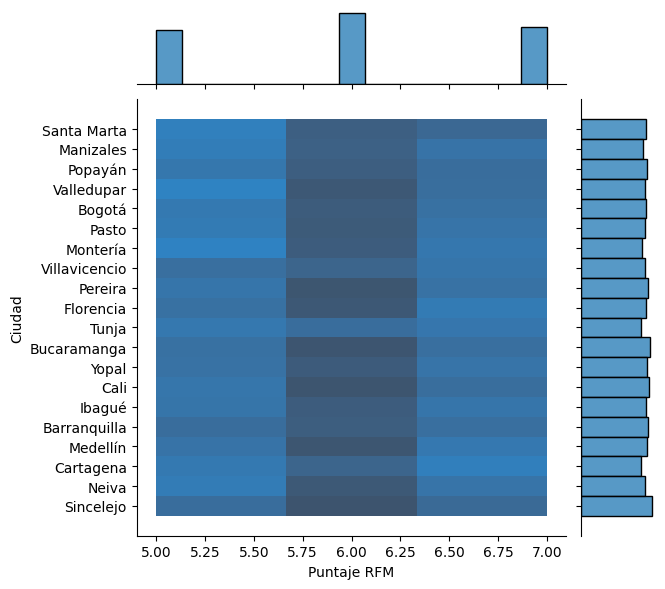

In [150]:
sns.jointplot(
    data=customers.loc[(customers["Puntaje_RFM"].astype("float") > 4) & (customers["Puntaje_RFM"].astype("float") < 8) ].sort_values("rfm_mean_ciudad", ascending=False),
    x="Puntaje_RFM",
    y="ciudad",
    kind="hist",
    # joint_kws={"binwidth": [3/4, 1]}
    bins=3
)
plt.ylabel("Ciudad")
plt.xlabel("Puntaje RFM")
plt.show()

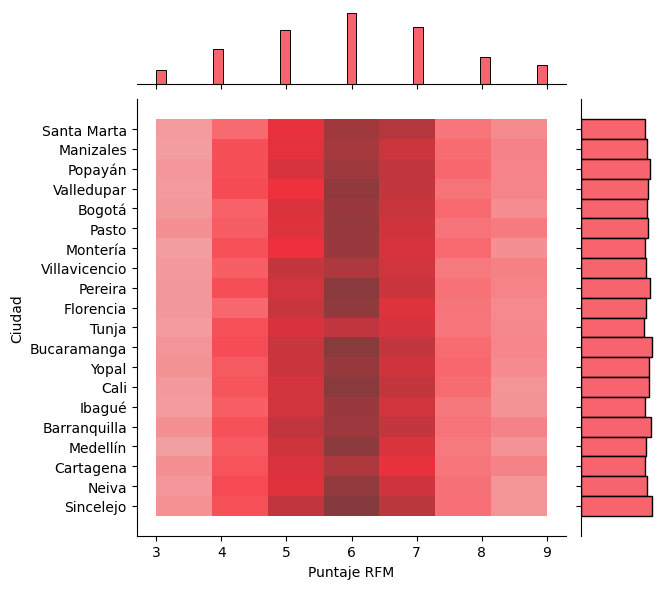

In [179]:
sns.jointplot(
    data=customers.loc[(customers["Puntaje_RFM"].astype("float") > 0) ].sort_values("rfm_mean_ciudad", ascending=False),
    x="Puntaje_RFM",
    y="ciudad",
    kind="hist",
    color="#f6303e",
    bins=7
)
plt.ylabel("Ciudad")
plt.xlabel("Puntaje RFM")
plt.show()

In [119]:
customers.head()

,customer_id,ciudad,canal_preferido,edad,fecha_registro,customers_por_ciudad,customers_por_canal,recency,frequency,monetary,promo,Puntaje_RFM
0,C200000,Valledupar,web,33,2024-03-26,1005,9929,95 days,6.0,1.136249e+07,0.0,6.0
1,C200001,Pasto,web,46,2024-10-20,1011,9929,9 days,6.0,1.083240e+07,0.0,5.0
2,C200002,Valledupar,tienda,28,2025-07-14,1005,3693,1 days,3.0,3.012146e+06,1.0,6.0
3,C200003,Montería,web,34,2025-01-25,961,9929,79 days,7.0,8.986518e+06,0.0,5.0
4,C200004,Cartagena,tienda,50,2024-08-01,963,3693,70 days,5.0,7.962296e+06,2.0,6.0


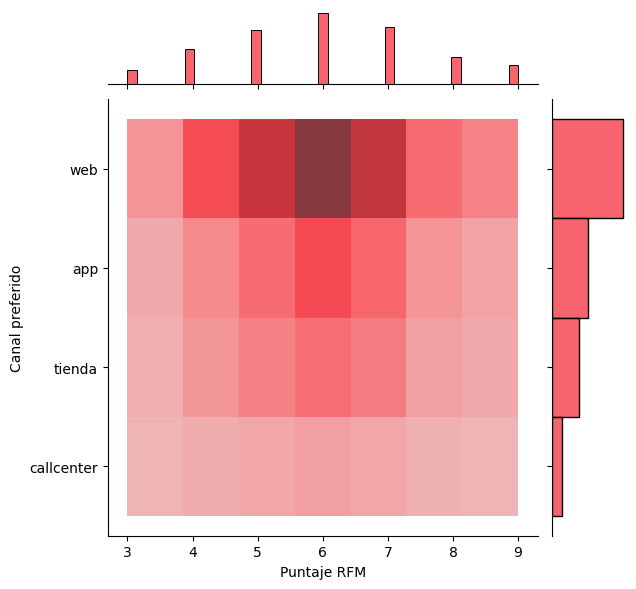

In [251]:
sns.jointplot(
    data=customers.loc[customers["Puntaje_RFM"].astype("float") > 0 ].sort_values("customers_por_canal", ascending=False),
    x="Puntaje_RFM",
    y="canal_preferido",
    kind="hist",
    color="#f6303e",
    # joint_kws={"binwidth": [0.9, 1]}
    bins=7
)
plt.ylabel("Canal preferido")
plt.xlabel("Puntaje RFM")
plt.show()

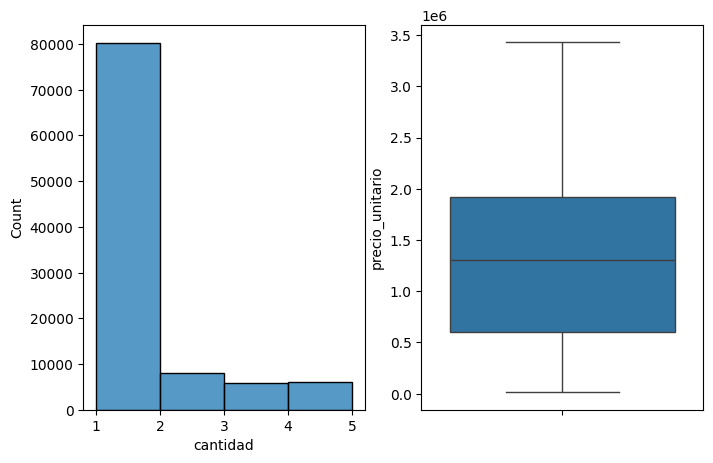

In [152]:
fig, ax = plt.subplots(1,2, figsize=(8,5))

sns.histplot(
    data=transactions,
    x="cantidad",
    bins=4,
    ax=ax[0]
)

sns.boxplot(
    data=transactions,
    y="precio_unitario",
    # color="salmon",
    ax=ax[1]
)

plt.show()

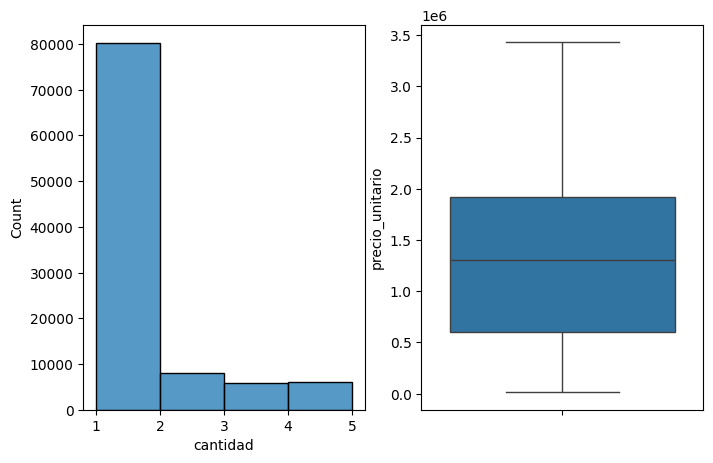

In [153]:
fig, ax = plt.subplots(1,2, figsize=(8,5))

sns.histplot(
    data=transactions,
    x="cantidad",
    bins=4,
    ax=ax[0]
)

sns.boxplot(
    data=transactions,
    y="precio_unitario",
    # color="salmon",
    ax=ax[1]
)

plt.show()

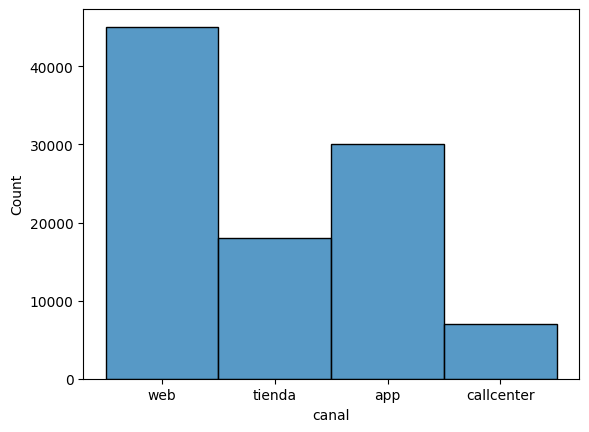

In [154]:
sns.histplot(
    data=transactions,
    x="canal"
)

plt.show()

In [155]:
transactions["rango_precio"] = transactions["precio_unitario"].apply(lambda precio: f"$ {500e3*(precio // 500e3):,} - $ {500e3*(precio // 500e3 + 1):,}")

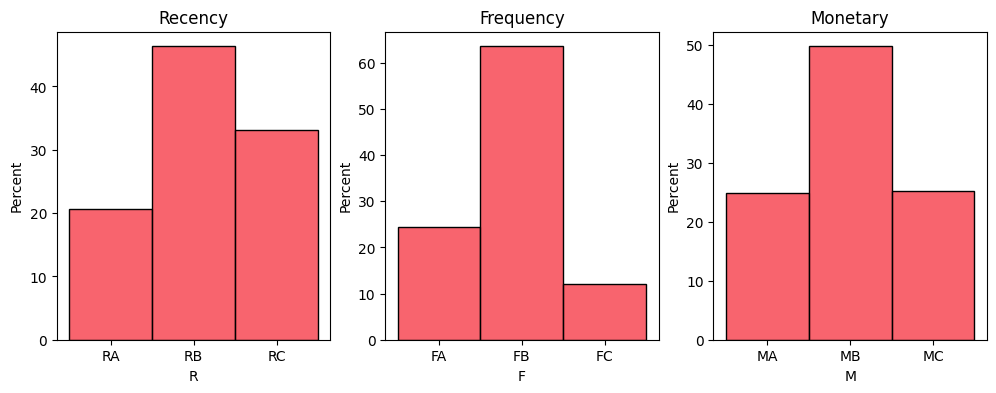

In [159]:
fig , ax = plt.subplots(1,3, figsize=(12,4))

sns.histplot(
    data=info_customer_transactions.sort_values("R"), 
    x="R",
    color="#f6303e",
    stat='percent',
    ax=ax[0]
    )
ax[0].set_title("Recency")

sns.histplot(
    data=info_customer_transactions.sort_values("F"), 
    x="F",
    color="#f6303e",
    stat='percent',
    ax=ax[1]
    )
ax[1].set_title("Frequency")

sns.histplot(
    data=info_customer_transactions.sort_values("M"), 
    x="M",
    color="#f6303e",
    stat='percent',
    ax=ax[2]
    )
ax[2].set_title("Monetary")

plt.show()

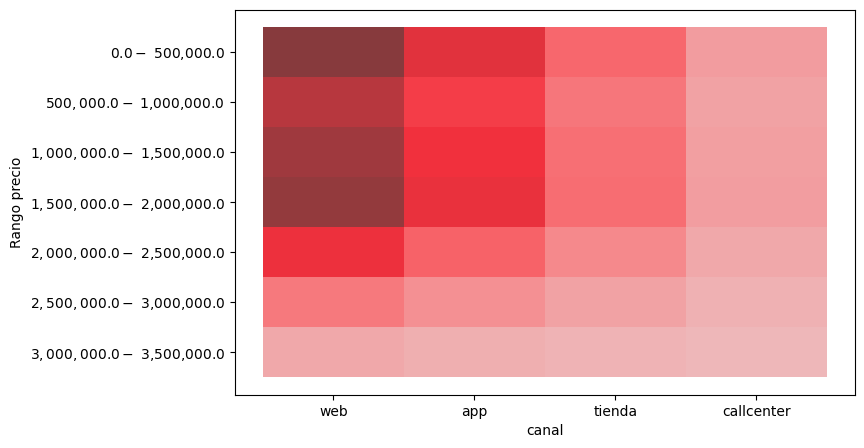

In [178]:
fig , ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=transactions.sort_values("precio_unitario"),
            x="canal",
            y="rango_precio",
            ax=ax,
            color="#f6303e"
             )
plt.ylabel("Rango precio")
plt.show()

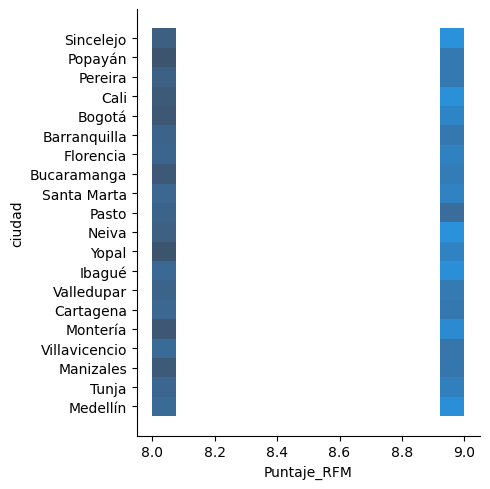

In [180]:
sns.displot(
    data=customers.loc[customers["Puntaje_RFM"].astype("float") > 7 ].sort_values("Puntaje_RFM"),
    x="Puntaje_RFM",
    y="ciudad"
)

plt.show()

In [181]:
ciudad_rfm["coef_rfm"] = (ciudad_rfm["ciudad_rfm_mean"] - info_customer_transactions["Puntaje_RFM"].mean()) * (1 - ciudad_rfm["porc"])
ciudad_rfm["coef_rfm"] = ciudad_rfm["coef_rfm"] - ciudad_rfm["coef_rfm"].min()
ciudad_rfm["coef_rfm"] = ciudad_rfm["coef_rfm"] / ciudad_rfm["coef_rfm"].max()
ciudad_rfm

,ciudad,ciudad_rfm_mean,cantidad,porc,coef_rfm
0,Santa Marta,6.090909,957,0.048168,1.000000
1,Manizales,6.070408,980,0.049326,0.873442
2,Popayán,6.045809,1026,0.051641,0.721739
3,Valledupar,6.044088,998,0.050232,0.711559
4,Bogotá,6.043611,986,0.049628,0.708782
5,Pasto,6.041833,1004,0.050534,0.697646
6,Montería,6.028391,951,0.047866,0.615614
7,Villavicencio,6.020513,975,0.049074,0.567027
8,Pereira,6.006803,1029,0.051792,0.482756
9,Florencia,6.005128,975,0.049074,0.472514


<Axes: xlabel='coef_rfm', ylabel='Count'>

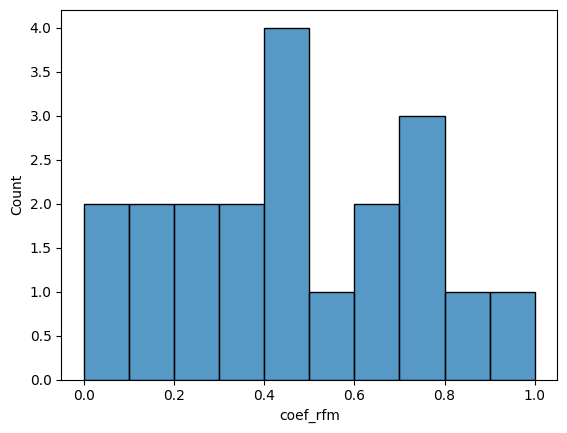

In [182]:
sns.histplot(data=ciudad_rfm, x="coef_rfm", bins=10)

In [183]:
canal_rfm["coef_rfm"] = (canal_rfm["canal_preferido_rfm_mean"] - info_customer_transactions["Puntaje_RFM"].mean()) * (1 - canal_rfm["porc"])
canal_rfm["coef_rfm"] = canal_rfm["coef_rfm"] - canal_rfm["coef_rfm"].min()
canal_rfm["coef_rfm"] = canal_rfm["coef_rfm"] / canal_rfm["coef_rfm"].max()
canal_rfm

,canal_preferido,canal_preferido_rfm_mean,cantidad,porc,coef_rfm
0,tienda,6.018539,3668,0.184618,1.000000
1,web,6.010236,9867,0.496628,0.877891
2,app,5.999595,4935,0.248389,0.785977
3,callcenter,5.940629,1398,0.070364,0.000000


<Axes: xlabel='coef_rfm', ylabel='Count'>

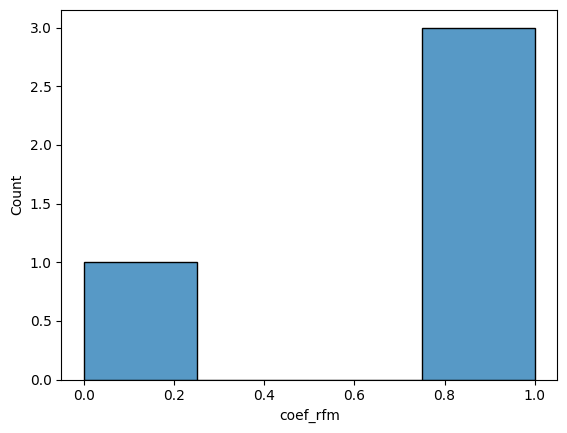

In [184]:
sns.histplot(data=canal_rfm, x="coef_rfm", bins=4)

In [185]:
customers["ciudad_rfm"] = customers["ciudad"].map(dict(zip(ciudad_rfm["ciudad"] , ciudad_rfm["coef_rfm"])))
customers["canal_rfm"] = customers["canal_preferido"].map(dict(zip(canal_rfm["canal_preferido"] , canal_rfm["coef_rfm"])))

In [186]:
customers.head()

,customer_id,ciudad,canal_preferido,edad,fecha_registro,customers_por_ciudad,customers_por_canal,recency,frequency,monetary,promo,Puntaje_RFM,rfm_mean_ciudad,ciudad_rfm,canal_rfm
0,C200000,Valledupar,web,33,2024-03-26,1005,9929,95 days,6.0,1.136249e+07,0.0,6.0,6.044088,0.711559,0.877891
1,C200001,Pasto,web,46,2024-10-20,1011,9929,9 days,6.0,1.083240e+07,0.0,5.0,6.041833,0.697646,0.877891
2,C200002,Valledupar,tienda,28,2025-07-14,1005,3693,1 days,3.0,3.012146e+06,1.0,6.0,6.044088,0.711559,1.000000
3,C200003,Montería,web,34,2025-01-25,961,9929,79 days,7.0,8.986518e+06,0.0,5.0,6.028391,0.615614,0.877891
4,C200004,Cartagena,tienda,50,2024-08-01,963,3693,70 days,5.0,7.962296e+06,2.0,6.0,5.948852,0.126485,1.000000


In [187]:
customers

,customer_id,ciudad,canal_preferido,edad,fecha_registro,customers_por_ciudad,customers_por_canal,recency,frequency,monetary,promo,Puntaje_RFM,rfm_mean_ciudad,ciudad_rfm,canal_rfm
0,C200000,Valledupar,web,33,2024-03-26,1005,9929,95 days,6.0,1.136249e+07,0.0,6.0,6.044088,0.711559,0.877891
1,C200001,Pasto,web,46,2024-10-20,1011,9929,9 days,6.0,1.083240e+07,0.0,5.0,6.041833,0.697646,0.877891
2,C200002,Valledupar,tienda,28,2025-07-14,1005,3693,1 days,3.0,3.012146e+06,1.0,6.0,6.044088,0.711559,1.000000
3,C200003,Montería,web,34,2025-01-25,961,9929,79 days,7.0,8.986518e+06,0.0,5.0,6.028391,0.615614,0.877891
4,C200004,Cartagena,tienda,50,2024-08-01,963,3693,70 days,5.0,7.962296e+06,2.0,6.0,5.948852,0.126485,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C219995,Villavicencio,web,38,2024-07-07,979,9929,158 days,2.0,4.346957e+06,0.0,9.0,6.020513,0.567027,0.877891
19996,C219996,Yopal,app,32,2024-02-14,1029,4974,56 days,3.0,4.877511e+06,0.0,7.0,5.989194,0.374839,0.785977
19997,C219997,Villavicencio,web,24,2025-06-25,979,9929,78 days,5.0,6.622227e+06,0.0,6.0,6.020513,0.567027,0.877891
19998,C219998,Santa Marta,web,18,2025-09-19,970,9929,170 days,9.0,9.281755e+06,0.0,6.0,6.090909,1.000000,0.877891


<Axes: xlabel='canal_rfm', ylabel='Count'>

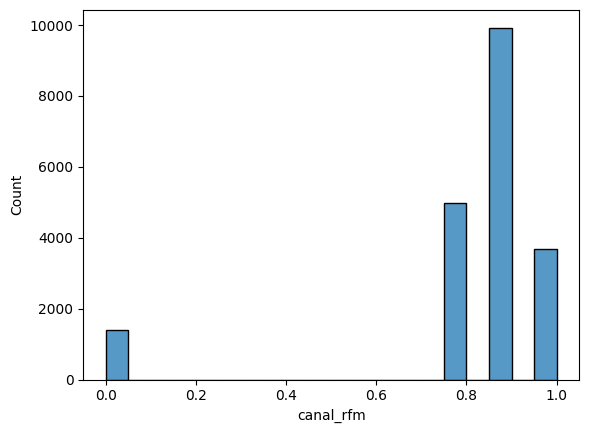

In [261]:
sns.histplot(data=customers, x="canal_rfm", bins=20)


<Axes: xlabel='ciudad_rfm', ylabel='Count'>

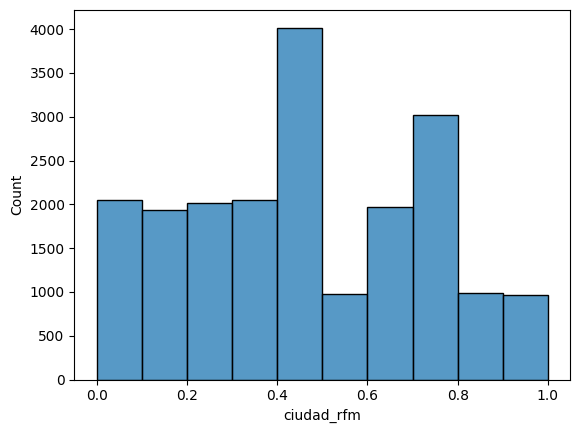

In [189]:
sns.histplot(data=customers, x="ciudad_rfm", bins=10)


<Axes: xlabel='monetary', ylabel='Count'>

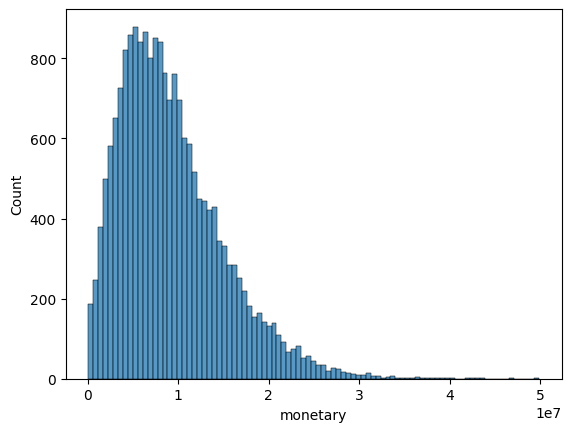

In [190]:
sns.histplot(data=customers, x="monetary")

<Axes: xlabel='frequency', ylabel='Count'>

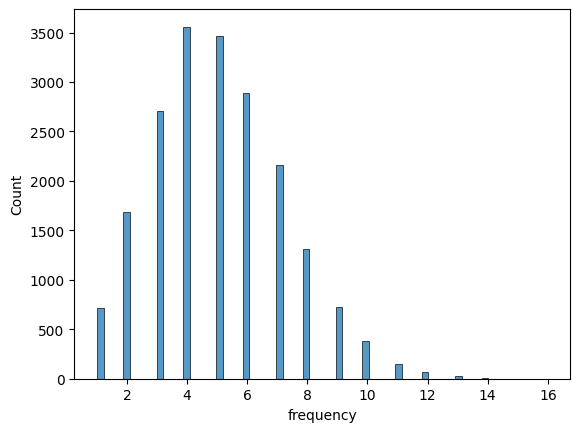

In [191]:
sns.histplot(data=customers, x="frequency")

In [192]:
customers["recency"] = customers["recency"].apply(lambda dt: dt.days)

<Axes: xlabel='recency', ylabel='Count'>

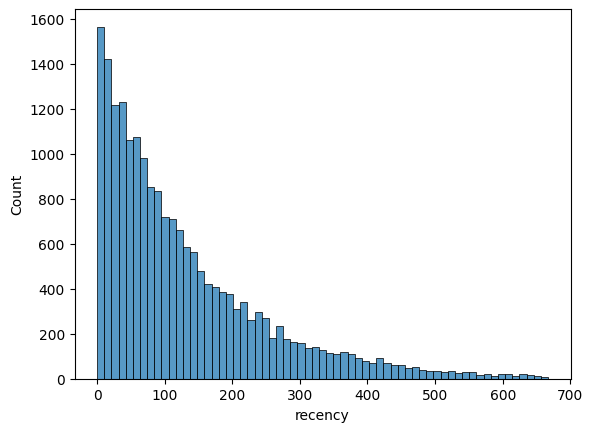

In [193]:
sns.histplot(data=customers, x="recency")

<Axes: xlabel='edad', ylabel='Count'>

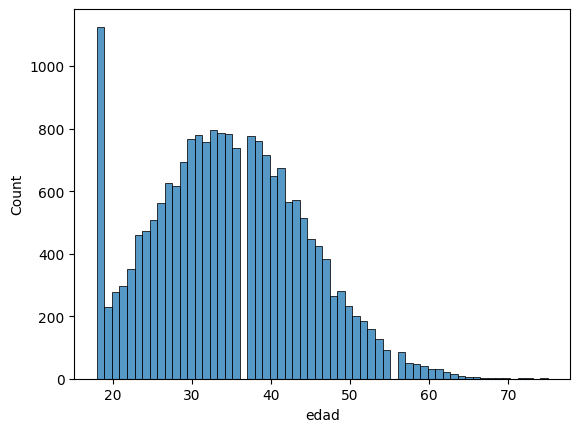

In [194]:
sns.histplot(data=customers, x="edad")

In [195]:
customers["dias_de_registro"] = transactions["fecha"].max() - pd.to_datetime(customers["fecha_registro"])
customers["dias_de_registro"] = customers["dias_de_registro"].apply(lambda dt: dt.days)
customers["coef_ddr"] = customers["dias_de_registro"] - customers["dias_de_registro"].min()
customers["coef_ddr"] = customers["coef_ddr"] / customers["coef_ddr"].max()
customers

,customer_id,ciudad,canal_preferido,edad,fecha_registro,customers_por_ciudad,customers_por_canal,recency,frequency,monetary,promo,Puntaje_RFM,rfm_mean_ciudad,ciudad_rfm,canal_rfm,dias_de_registro,coef_ddr
0,C200000,Valledupar,web,33,2024-03-26,1005,9929,95.0,6.0,1.136249e+07,0.0,6.0,6.044088,0.711559,0.877891,584,0.872754
1,C200001,Pasto,web,46,2024-10-20,1011,9929,9.0,6.0,1.083240e+07,0.0,5.0,6.041833,0.697646,0.877891,376,0.561377
2,C200002,Valledupar,tienda,28,2025-07-14,1005,3693,1.0,3.0,3.012146e+06,1.0,6.0,6.044088,0.711559,1.000000,109,0.161677
3,C200003,Montería,web,34,2025-01-25,961,9929,79.0,7.0,8.986518e+06,0.0,5.0,6.028391,0.615614,0.877891,279,0.416168
4,C200004,Cartagena,tienda,50,2024-08-01,963,3693,70.0,5.0,7.962296e+06,2.0,6.0,5.948852,0.126485,1.000000,456,0.681138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C219995,Villavicencio,web,38,2024-07-07,979,9929,158.0,2.0,4.346957e+06,0.0,9.0,6.020513,0.567027,0.877891,481,0.718563
19996,C219996,Yopal,app,32,2024-02-14,1029,4974,56.0,3.0,4.877511e+06,0.0,7.0,5.989194,0.374839,0.785977,625,0.934132
19997,C219997,Villavicencio,web,24,2025-06-25,979,9929,78.0,5.0,6.622227e+06,0.0,6.0,6.020513,0.567027,0.877891,128,0.190120
19998,C219998,Santa Marta,web,18,2025-09-19,970,9929,170.0,9.0,9.281755e+06,0.0,6.0,6.090909,1.000000,0.877891,42,0.061377


<Axes: xlabel='coef_ddr', ylabel='Count'>

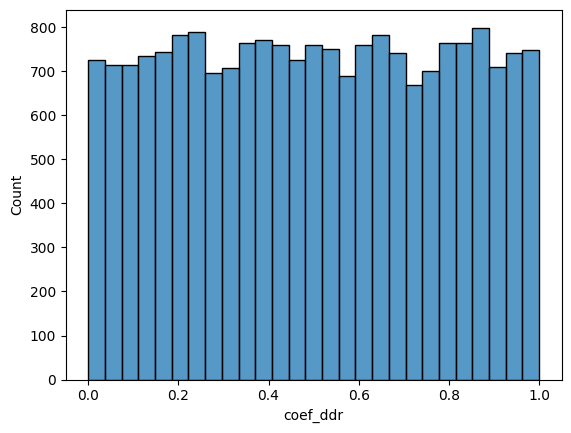

In [196]:
sns.histplot(data=customers, x="coef_ddr")

In [197]:
date_max = pd.to_datetime('2025-05-25')
transactions["fecha"] = pd.to_datetime(transactions["fecha"])
transactions = transactions.sort_values("fecha")
test = transactions.loc[transactions["fecha"] <= date_max].copy()
val = transactions.loc[transactions["fecha"] > date_max].copy()
val["customer_id"].unique()
customers["customer_id"].isin(val["customer_id"].unique()).astype("int")



0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    0
19999    1
Name: customer_id, Length: 20000, dtype: int64

In [198]:
def temporal_split(df, date_col, split_date):
    df = df.sort_values(date_col).copy()
    train = df[df[date_col] < split_date].copy()
    test = df[df[date_col] >= split_date].copy()
    return train, test

# Preparación de la data

In [199]:
def es_promo(sku, fecha, pmt):
    fecha = pd.to_datetime(fecha)
    promotions_temp = pmt.loc[pmt["sku"] == sku, ["fecha_inicio", "fecha_fin", "descuento_pct"]]
    descuento_pct = promotions_temp.loc[(
        (promotions_temp["fecha_inicio"] <= fecha) &
        (promotions_temp["fecha_fin"] >= fecha)
    ), ["descuento_pct"]]

    if descuento_pct.shape[0] == 1:
        return 1 , descuento_pct.values[0, 0]
    else:
        return 0 , 0

In [200]:
def recency(recency, q25, q75):
    if recency < pd.Timedelta(days=q25):
        return "RA"
    elif recency <= pd.Timedelta(days=q75):
        return "RB"
    else:
        return "RC"

In [201]:
def frequency(cantidad, q25, q75):
    if cantidad > q75:
        return "FA"
    elif cantidad >= q25:
        return "FB"
    else:
        return "FC"

In [202]:
def monetary(total, q25, q75):
    if total > q75:
        return "MA"
    elif total >= q25:
        return "MB"
    else:
        return "MC"

In [227]:
def make_data_to_model(customers, transactions, promotions, date_max, return_df=False):
    # Se genera copia para no afectar los originales
    ctm = customers.copy()
    tst = transactions.copy()
    pmt = promotions.copy()
    
    # Formato a datetime
    pmt["fecha_inicio"] = pd.to_datetime(pmt["fecha_inicio"])
    pmt["fecha_fin"] = pd.to_datetime(pmt["fecha_fin"])
    tst["fecha"] = pd.to_datetime(tst["fecha"])
    pmt["fecha_inicio"] = pd.to_datetime(pmt["fecha_inicio"])
    pmt["fecha_fin"] = pd.to_datetime(pmt["fecha_fin"])
    date_max = pd.to_datetime(date_max)

    # Se corta transaction para train y test
    tst = tst.sort_values("fecha")
    tst_test = tst.loc[tst["fecha"] > date_max].copy()     # test
    tst = tst.loc[tst["fecha"] <= date_max].copy()     # train
    # Label para test
    ctm_test = ctm[["customer_id"]].copy()
    ctm_test["label"] = ctm_test["customer_id"].isin(tst_test["customer_id"].unique()).astype("int")

    # Generacion de columnas
    # total_pagado
    tst["total_pagado"] = tst["precio_unitario"] * tst["cantidad"]
    tst[["es_promo", "descuento_pct"]] = tst.apply(lambda df: es_promo(df["sku"], df["fecha"], pmt), axis=1, result_type='expand')
    tst["total_pagado"] = tst["total_pagado"] * ((100 - tst["descuento_pct"]) / 100)
    # dias de registro
    ctm["dias_de_registro"] = tst["fecha"].max() - pd.to_datetime(ctm["fecha_registro"])
    ctm["dias_de_registro"] = ctm["dias_de_registro"].apply(lambda dt: dt.days)
    
    
    # RMF
    info_ctm_tst = tst.groupby("customer_id").agg(
        recency=("fecha", "max"),
        frequency=("sku", "count"),
        monetary=("total_pagado", "sum"),
        promo=("es_promo", "sum")
    ).reset_index()
    info_ctm_tst['recency'] = tst['fecha'].max() - info_ctm_tst['recency']

    # Recency
    # Se identifca la frecuencia de la cantidad de días que demora un cliente para volver a hacer otra compra
    day_diff = list()
    tst = tst.sort_values(["customer_id", "fecha"]).reset_index(drop=True)
    customer_0 = tst.loc[0, "customer_id"]
    for row in range(tst.shape[0] - 1):
        df_temp = tst.loc[[row, row + 1], ["customer_id", "fecha"]].copy()
        df_temp = df_temp.reset_index(drop=True)
        if df_temp.loc[1, "customer_id"] == customer_0:
            days = df_temp["fecha"].diff()[1].days
            if days > 0: day_diff.append(days)
        customer_0 = df_temp.loc[1, "customer_id"]

    rq25 = np.quantile(day_diff, q=0.25)
    rq75 = np.quantile(day_diff, q=0.75)
    info_ctm_tst["R"] = info_ctm_tst["recency"].apply(lambda r: recency(r, rq25, rq75))

    # Frequency
    fq25 = np.quantile(info_ctm_tst["frequency"].values, q=0.25)
    fq75 = np.quantile(info_ctm_tst["frequency"].values, q=0.75)
    info_ctm_tst["F"] = info_ctm_tst["frequency"].apply(lambda f: frequency(f, fq25, fq75))

    # Monetary
    mq25 = np.quantile(info_ctm_tst["monetary"].values, q=0.25)
    mq75 = np.quantile(info_ctm_tst["monetary"].values, q=0.75)
    info_ctm_tst["M"] = info_ctm_tst["monetary"].apply(lambda m: monetary(m, mq25, mq75))

    # Se calcula el puntaje total
    info_ctm_tst["puntaje_R"] = info_ctm_tst["R"].map(dict(zip(["RA", "RB", "RC"], [1 ,2, 3])))
    info_ctm_tst["puntaje_F"] = info_ctm_tst["F"].map(dict(zip(["FA", "FB", "FC"], [1 ,2, 3])))
    info_ctm_tst["puntaje_M"] = info_ctm_tst["M"].map(dict(zip(["MA", "MB", "MC"], [1 ,2, 3])))
    info_ctm_tst["Puntaje_RFM"] = info_ctm_tst["puntaje_R"] + info_ctm_tst["puntaje_F"] + info_ctm_tst["puntaje_M"]

    mean_rfm = info_ctm_tst["Puntaje_RFM"].mean()
    dsta_rfm = info_ctm_tst["Puntaje_RFM"].std()
    print(f"El puntaje RFM tiene una distribución normal con media: {mean_rfm:,.2f} y desviación estandar: {dsta_rfm:,.2f}.")
    
    # Se incorpora la información de info_ctm_tst a ctm
    ctm = ctm.merge(
        info_ctm_tst[["customer_id", "recency", "frequency", "monetary", "promo", "Puntaje_RFM"]],
        "left", "customer_id"
    )
    ctm["recency"] = ctm["recency"].fillna(info_ctm_tst["recency"].max())
    ctm["frequency"] = ctm["frequency"].fillna(0)
    ctm["monetary"] = ctm["monetary"].fillna(0)
    ctm["promo"] = ctm["promo"].fillna(0)
    ctm["Puntaje_RFM"] = ctm["Puntaje_RFM"].fillna(0)
    # Arregla el formato de recency a int
    ctm["recency"] = ctm["recency"].apply(lambda days: days.days)
    
    # stats ciudades-rfm
    ciudad_rfm = ctm[ctm["Puntaje_RFM"] > 0].groupby("ciudad").agg(
        ciudad_rfm_mean=("Puntaje_RFM", "mean"),
        cantidad=("Puntaje_RFM", "count"),
        ).reset_index().sort_values("ciudad_rfm_mean", ascending=False).reset_index(drop=True)
    ciudad_rfm["porc"] = ciudad_rfm["cantidad"] / ciudad_rfm["cantidad"].sum()
    # coef
    ciudad_rfm["coef_rfm"] = (ciudad_rfm["ciudad_rfm_mean"] - info_ctm_tst["Puntaje_RFM"].mean()) * (1 - ciudad_rfm["porc"])
    ciudad_rfm["coef_rfm"] = (ciudad_rfm["coef_rfm"] - ciudad_rfm["coef_rfm"].min()) / (ciudad_rfm["coef_rfm"].max() - ciudad_rfm["coef_rfm"].min())

    # stats canales-rfm
    canal_rfm = ctm[ctm["Puntaje_RFM"] > 0].groupby("canal_preferido").agg(
        canal_preferido_rfm_mean=("Puntaje_RFM", "mean"),
        cantidad=("Puntaje_RFM", "count"),
        ).reset_index().sort_values("canal_preferido_rfm_mean", ascending=False).reset_index(drop=True)
    canal_rfm["porc"] = canal_rfm["cantidad"] / canal_rfm["cantidad"].sum()
    # coef
    canal_rfm["coef_rfm"] = (canal_rfm["canal_preferido_rfm_mean"] - info_ctm_tst["Puntaje_RFM"].mean()) * (1 - canal_rfm["porc"])
    canal_rfm["coef_rfm"] = (canal_rfm["coef_rfm"] - canal_rfm["coef_rfm"].min()) / (canal_rfm["coef_rfm"].max() - canal_rfm["coef_rfm"].min())

    # Se agrega la información de ciudades-rfm y canales-rfm a customers
    ctm["ciudad_rfm"] = ctm["ciudad"].map(dict(zip(ciudad_rfm["ciudad"] , ciudad_rfm["coef_rfm"])))
    ctm["canal_rfm"] = ctm["canal_preferido"].map(dict(zip(canal_rfm["canal_preferido"] , canal_rfm["coef_rfm"])))
    
    # Se Normalizan y Escalan variables
    ctm["edad_norm"] = (ctm["edad"].mean() - ctm["edad"]) / ctm["edad"].std()
    ctm["ddr_esca"] = (ctm["dias_de_registro"] - ctm["dias_de_registro"].min()) / (ctm["dias_de_registro"].max() - ctm["dias_de_registro"].min())
    ctm["promo_esca"] = (ctm["promo"] - ctm["promo"].min()) / (ctm["promo"].max() - ctm["promo"].min())
    ctm["punt_norm"] = (ctm["Puntaje_RFM"].mean() - ctm["Puntaje_RFM"]) / ctm["Puntaje_RFM"].std()
    
    if return_df:
        return ctm , ctm_test
    else:
        return ctm[["edad_norm", "ddr_esca", "promo_esca", "recency", "frequency", "monetary", "punt_norm", "ciudad_rfm", "canal_rfm"]].values , ctm_test["label"].values

In [262]:
df_test , _ = make_data_to_model(customers_raw, transactions_raw, promotions_raw, date_max='2025-10-31', return_df=True)

El puntaje RFM tiene una distribución normal con media: 6.00 y desviación estandar: 1.54.


In [264]:
df_test.head()

,customer_id,ciudad,canal_preferido,edad,fecha_registro,dias_de_registro,recency,frequency,monetary,promo,Puntaje_RFM,ciudad_rfm,canal_rfm,edad_norm,ddr_esca,promo_esca,punt_norm
0,C200000,Valledupar,web,33,2024-03-26,584,95,6.0,1.136249e+07,0.0,6.0,0.730322,0.877302,0.171074,0.872754,0.000000,-0.023465
1,C200001,Pasto,web,46,2024-10-20,376,9,6.0,1.083240e+07,0.0,5.0,0.710259,0.877302,-1.185500,0.561377,0.000000,0.598938
2,C200002,Valledupar,tienda,28,2025-07-14,109,1,3.0,3.012146e+06,1.0,6.0,0.730322,1.000000,0.692834,0.161677,0.333333,-0.023465
3,C200003,Montería,web,34,2025-01-25,279,79,7.0,8.986518e+06,0.0,5.0,0.634240,0.877302,0.066723,0.416168,0.000000,0.598938
4,C200004,Cartagena,tienda,50,2024-08-01,456,70,5.0,7.962296e+06,2.0,6.0,0.137798,1.000000,-1.602907,0.681138,0.666667,-0.023465


In [263]:
df_test.head()

,customer_id,ciudad,canal_preferido,edad,fecha_registro,dias_de_registro,recency,frequency,monetary,promo,Puntaje_RFM,ciudad_rfm,canal_rfm,edad_norm,ddr_esca,promo_esca,punt_norm
0,C200000,Valledupar,web,33,2024-03-26,584,95,6.0,1.136249e+07,0.0,6.0,0.730322,0.877302,0.171074,0.872754,0.000000,-0.023465
1,C200001,Pasto,web,46,2024-10-20,376,9,6.0,1.083240e+07,0.0,5.0,0.710259,0.877302,-1.185500,0.561377,0.000000,0.598938
2,C200002,Valledupar,tienda,28,2025-07-14,109,1,3.0,3.012146e+06,1.0,6.0,0.730322,1.000000,0.692834,0.161677,0.333333,-0.023465
3,C200003,Montería,web,34,2025-01-25,279,79,7.0,8.986518e+06,0.0,5.0,0.634240,0.877302,0.066723,0.416168,0.000000,0.598938
4,C200004,Cartagena,tienda,50,2024-08-01,456,70,5.0,7.962296e+06,2.0,6.0,0.137798,1.000000,-1.602907,0.681138,0.666667,-0.023465


# Entrenamiento modelo

In [204]:
transactions["fecha"] = pd.to_datetime(transactions["fecha"])
transactions = transactions.sort_values("fecha")

In [205]:
X , y = make_data_to_model(
    customers=customers_raw,
    transactions=transactions_raw,
    promotions=promotions,
    date_max="2025-07-31"
)

El puntaje RFM tiene una distribución normal con media: 6.17 y desviación estandar: 1.53.


In [ ]:
# X , y = make_data_to_model(
#     customers=customers,
#     transactions=transactions.loc[transactions["fecha"] < pd.to_datetime("2025-02-01")],
#     promotions=promotions,
#     date_max="2024-10-31"
# )

In [206]:
y_val = customer_labels["label_recompra_90d"].values
X_val , _ = make_data_to_model(customers_raw, transactions_raw, promotions_raw, date_max='2025-10-31')

El puntaje RFM tiene una distribución normal con media: 6.00 y desviación estandar: 1.54.


In [208]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [209]:
np.isnan(X).sum(axis=0)
# pd.isna(X).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

## Regresión Logistica

In [210]:
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [211]:
y_pred = model.predict(X)

In [212]:
np.mean(y_pred == y)

np.float64(0.50285)

In [213]:
y_val_pred = model.predict(X_val)

In [214]:
np.mean(y_val_pred == y_val)

np.float64(0.69725)

In [215]:
cm = confusion_matrix(y_val, y_val_pred)

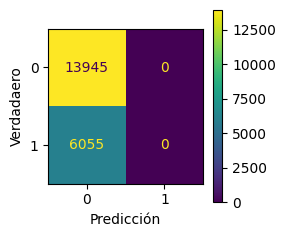

In [216]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
plt.show()

## Arboleres de desición

In [265]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [266]:
y_pred = clf.predict(X)

In [267]:
np.mean(y_pred == y)

np.float64(1.0)

In [268]:
y_val_pred = clf.predict(X_val)

In [269]:
np.mean(y_val_pred == y_val)

np.float64(0.52075)

In [301]:
auc_score = roc_auc_score(y_val_pred, y_val)
print(f"AUC Score del Modelo: {auc_score:.4f}")

AUC Score del Modelo: 0.5078


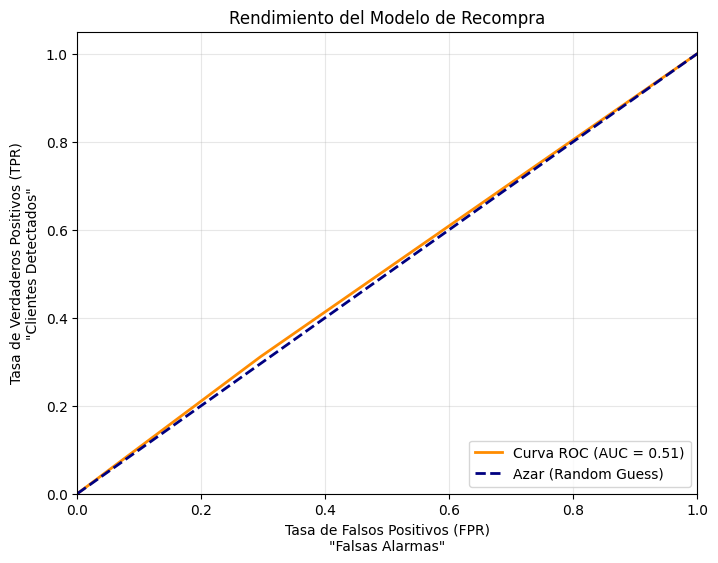

In [302]:
# 3. Generar Curva ROC
fpr, tpr, thresholds = roc_curve(y_val_pred, y_val)

# 4. Graficar para la presentación
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (Random Guess)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)\n"Falsas Alarmas"')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)\n"Clientes Detectados"')
plt.title('Rendimiento del Modelo de Recompra')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [270]:
cm = confusion_matrix(y_val, y_val_pred)

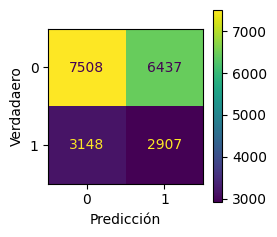

In [271]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
plt.show()

### Análisis resultados

In [287]:
df_test.columns

Index(['customer_id', 'ciudad', 'canal_preferido', 'edad', 'fecha_registro',
       'dias_de_registro', 'recency', 'frequency', 'monetary', 'promo',
       'Puntaje_RFM', 'ciudad_rfm', 'canal_rfm', 'edad_norm', 'ddr_esca',
       'promo_esca', 'punt_norm'],
      dtype='object')

<Axes: xlabel='ddr_esca', ylabel='Count'>

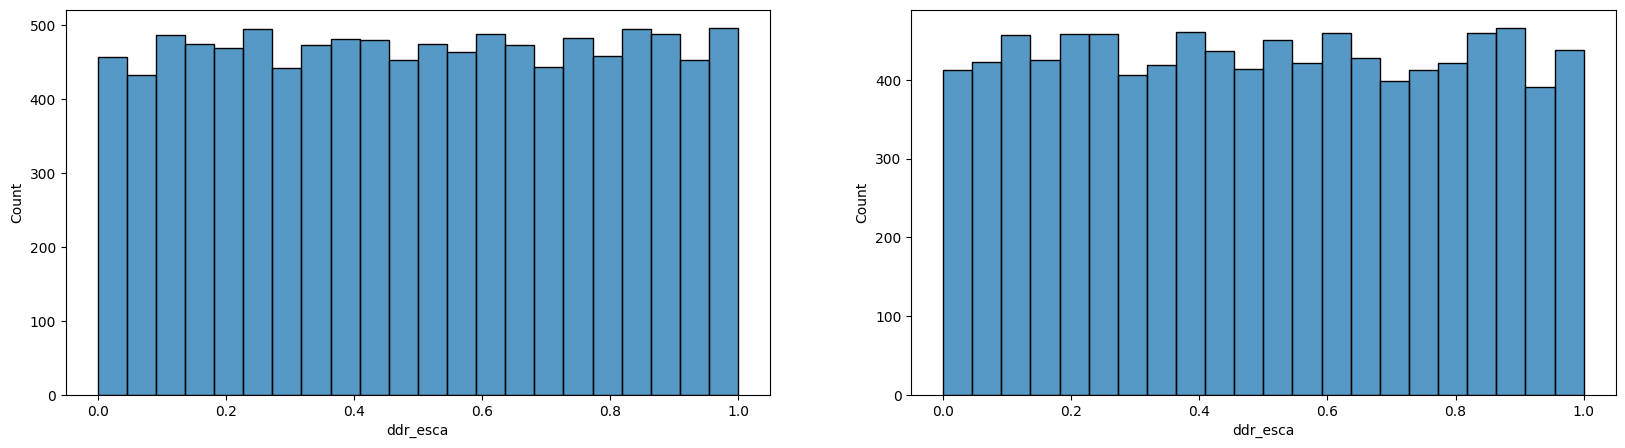

In [299]:
fig , ax = plt.subplots(1 , 2 , figsize=(20, 5))
col = "ddr_esca"
bins = df_test[col].nunique()

sns.histplot(
    data=df_test[(y_val_pred == y_val) & (df_test["Puntaje_RFM"] > 0)],
    x=col,
    ax=ax[0],
    # bins=bins
)

sns.histplot(
    data=df_test[(y_val_pred != y_val) & (df_test["Puntaje_RFM"] > 0)],
    x=col,
    ax=ax[1],
    # bins=bins
)

<Axes: xlabel='canal_preferido', ylabel='Count'>

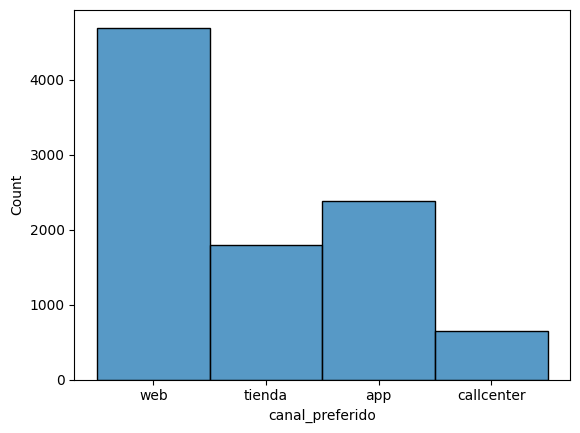

In [284]:
sns.histplot(
    data=df_test[(y_val_pred != y_val) & (df_test["Puntaje_RFM"] > 0)],
    x="canal_preferido"
)

## SVM

In [ ]:
# model = SVC(kernel='linear', probability=True)
# model.fit(X, y)

In [ ]:
# y_pred = model.predict(X)

In [ ]:
# np.mean(y_pred == y)

In [ ]:
# y_val_pred = model.predict(X_val)

In [ ]:
# np.mean(y_val_pred == y_val)

In [ ]:
# cm = confusion_matrix(y_val, y_val_pred)

In [ ]:
# fig , ax = plt.subplots(figsize = (2.5, 2.5))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(ax = ax)
# ax.set_xlabel("Predicción")
# ax.set_ylabel("Verdadaero")
# plt.show()

## Random Forest

In [359]:
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=20,
    max_leaf_nodes=5,
    # class_weight={1: 1, 0: 2.3}
    )
model.fit(X, y)

/home/alejandro/Proyectos/pruebaCienciaDeDatos/venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,10
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [360]:
y_pred = model.predict(X)

In [361]:
np.mean(y_pred == y)

np.float64(0.500856425)

In [362]:
y_val_pred = model.predict(X_val)

In [363]:
np.mean(y_val_pred == y_val)

np.float64(0.579)

In [364]:
auc_score = roc_auc_score(y_val_pred, y_val)
print(f"AUC Score del Modelo: {auc_score:.4f}")

AUC Score del Modelo: 0.4947


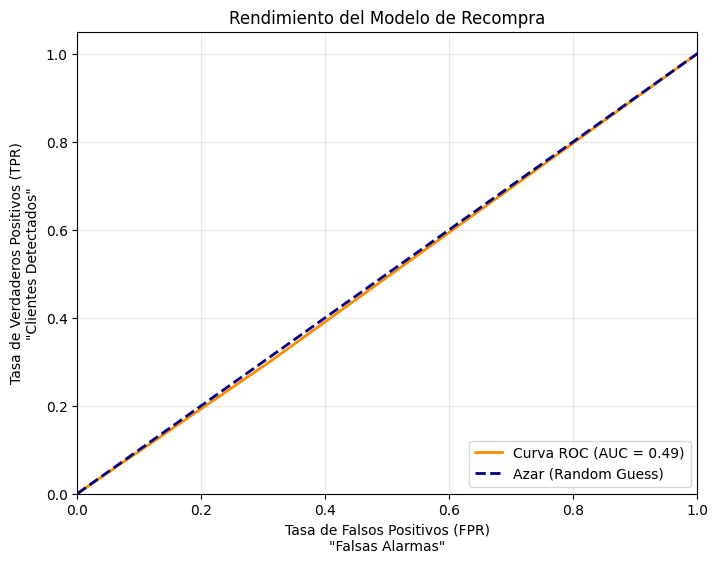

In [365]:
# 3. Generar Curva ROC
fpr, tpr, thresholds = roc_curve(y_val_pred, y_val)

# 4. Graficar para la presentación
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (Random Guess)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)\n"Falsas Alarmas"')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)\n"Clientes Detectados"')
plt.title('Rendimiento del Modelo de Recompra')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [366]:
cm = confusion_matrix(y_val, y_val_pred)

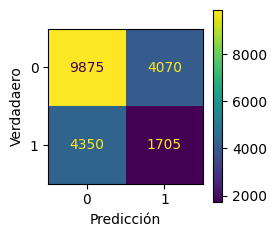

In [367]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
plt.show()

## XGBoost

In [370]:
model = xgb.XGBClassifier(
    n_estimators=200,       # número de árboles
    max_depth=15,            # profundidad máxima de cada árbol
    learning_rate=0.1,      # tasa de aprendizaje
    random_state=144,
    use_label_encoder=False,
    eval_metric="logloss"   # métrica de evaluación
)
model.fit(X, y.flatten())


/home/alejandro/Proyectos/pruebaCienciaDeDatos/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [07:52:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [371]:
y_pred = model.predict(X)

In [372]:
np.mean(y_pred == y)

np.float64(0.50001596)

In [373]:
y_val_pred = model.predict(X_val)

In [374]:
np.mean(y_val_pred == y_val)

np.float64(0.53455)

In [375]:
auc_score = roc_auc_score(y_val_pred, y_val)
print(f"AUC Score del Modelo: {auc_score:.4f}")

AUC Score del Modelo: 0.5015


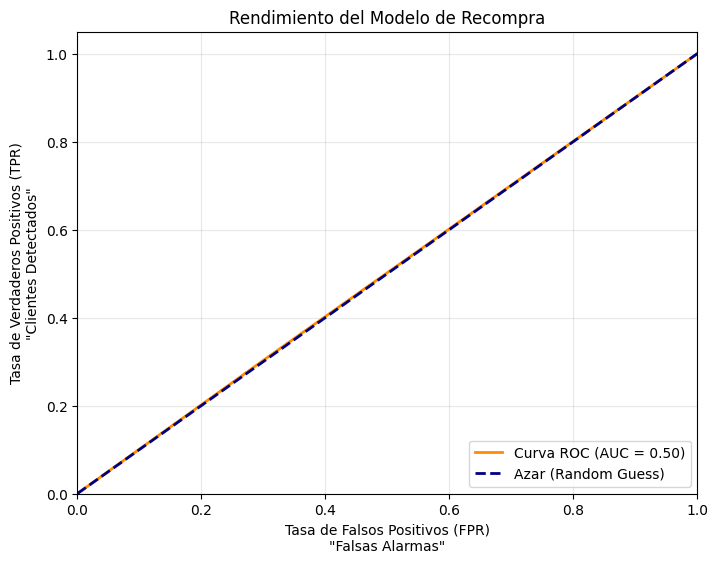

In [320]:
# 3. Generar Curva ROC
fpr, tpr, thresholds = roc_curve(y_val_pred, y_val)

# 4. Graficar para la presentación
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (Random Guess)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)\n"Falsas Alarmas"')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)\n"Clientes Detectados"')
plt.title('Rendimiento del Modelo de Recompra')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [317]:
cm = confusion_matrix(y_val, y_val_pred)

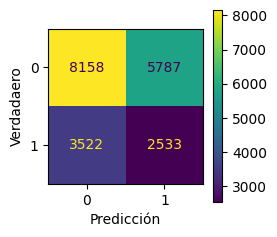

In [321]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
plt.show()


## NN

In [322]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score

# Configuración de dispositivo
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [323]:
class CustomerChurnDataset(Dataset):
    """
    Dataset personalizado para cargar características de clientes.
    """
    def __init__(self, features, targets):
        # Convertimos a tensores flotantes
        self.features = torch.tensor(features, dtype=torch.float32)
        # El target debe tener forma (N, 1)
        self.targets = torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [324]:
class RepurchaseNet(nn.Module):

    def __init__(self, input_dim, hidden_dim=64, dropout_rate=0.3):
        super(RepurchaseNet, self).__init__()
        
        # Bloque 1
        self.layer_1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        
        # Bloque 2
        self.layer_2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),            
            nn.Dropout(dropout_rate)
        )
        
        self.output_layer = nn.Linear(hidden_dim // 4, 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.output_layer(x)
        return x

In [325]:


def train_model(model, train_loader, val_loader, epochs=20, learning_rate=0.001):
    """
    Bucle de entrenamiento con validación.
    """
    criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([3.0]).to(DEVICE)) 
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    model.to(DEVICE)
    
    print(f"Iniciando entrenamiento en: {DEVICE}")
    print("-" * 30)

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
            
            optimizer.zero_grad()
            
            # Forward pass
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
        # Validación
        val_auc, val_f1 = evaluate_model(model, val_loader)
        
        print(f"Epoca {epoch+1}/{epochs} | "
              f"Loss: {train_loss/len(train_loader):.4f} | "
              f"Val AUC: {val_auc:.4f} | Val F1: {val_f1:.4f}")


In [326]:

def evaluate_model(model, loader):
    model.eval()
    all_targets = []
    all_probs = []
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(DEVICE)
            logits = model(X_batch)
            probs = torch.sigmoid(logits) # Aplicamos sigmoide aquí para metricas
            
            all_probs.extend(probs.cpu().numpy())
            all_targets.extend(y_batch.numpy())
            
    # Convertir a arrays para sklearn
    y_true = np.array(all_targets)
    y_scores = np.array(all_probs)
    y_pred = (y_scores > 0.5).astype(int) # Umbral de decisión
    
    try:
        auc = roc_auc_score(y_true, y_scores)
        f1 = f1_score(y_true, y_pred)
    except ValueError:
        auc = 0.5 # Caso borde si solo hay una clase en el batch
        f1 = 0
        
    return auc, f1


In [327]:
y = y[:,None]

In [328]:
train_ds = CustomerChurnDataset(X, y)
val_ds = CustomerChurnDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

In [329]:
model = RepurchaseNet(input_dim=X.shape[1])
train_model(model, train_loader, val_loader, epochs=100)

Iniciando entrenamiento en: cuda
------------------------------
Epoca 1/100 | Loss: 1.1572 | Val AUC: 0.5085 | Val F1: 0.4648
Epoca 2/100 | Loss: 1.1372 | Val AUC: 0.4982 | Val F1: 0.4648
Epoca 3/100 | Loss: 1.1323 | Val AUC: 0.4915 | Val F1: 0.4648
Epoca 4/100 | Loss: 1.1318 | Val AUC: 0.4983 | Val F1: 0.4648
Epoca 5/100 | Loss: 1.1311 | Val AUC: 0.5021 | Val F1: 0.4648
Epoca 6/100 | Loss: 1.1281 | Val AUC: 0.5028 | Val F1: 0.4648
Epoca 7/100 | Loss: 1.1293 | Val AUC: 0.4952 | Val F1: 0.4648
Epoca 8/100 | Loss: 1.1285 | Val AUC: 0.4924 | Val F1: 0.4648
Epoca 9/100 | Loss: 1.1279 | Val AUC: 0.4922 | Val F1: 0.4648
Epoca 10/100 | Loss: 1.1275 | Val AUC: 0.5039 | Val F1: 0.4648
Epoca 11/100 | Loss: 1.1273 | Val AUC: 0.5059 | Val F1: 0.4648
Epoca 12/100 | Loss: 1.1275 | Val AUC: 0.4999 | Val F1: 0.4648
Epoca 13/100 | Loss: 1.1275 | Val AUC: 0.4928 | Val F1: 0.4648
Epoca 14/100 | Loss: 1.1271 | Val AUC: 0.4928 | Val F1: 0.4648
Epoca 15/100 | Loss: 1.1263 | Val AUC: 0.5020 | Val F1: 0.4648


In [332]:
model.eval()
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(DEVICE)
with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    y_val_pred = torch.sigmoid(y_val_pred).cpu().numpy()

In [344]:
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

In [345]:
np.mean(y_val_pred_binary == y_val)

np.float64(0.30275)

In [347]:
auc_score = roc_auc_score(y_val_pred_binary, y_val)
print(f"AUC Score del Modelo: {auc_score:.4f}")

AUC Score del Modelo: nan


/home/alejandro/Proyectos/pruebaCienciaDeDatos/venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


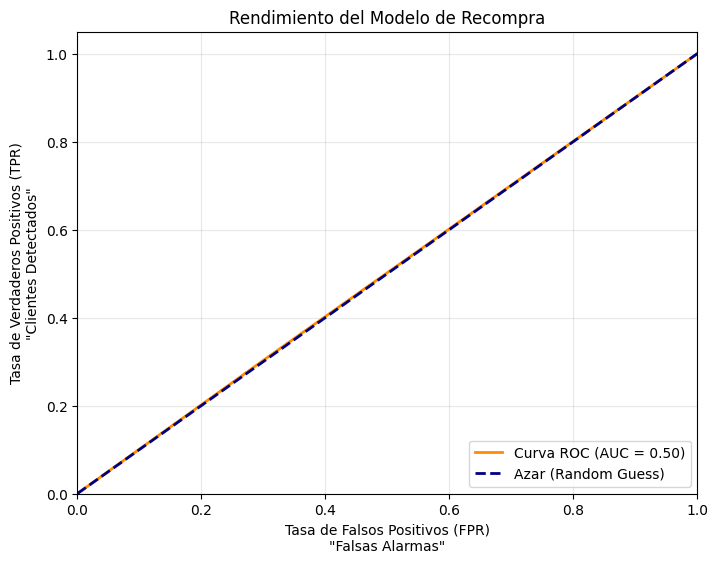

In [ ]:
# 3. Generar Curva ROC
fpr, tpr, thresholds = roc_curve(y_val_pred, y_val)

# 4. Graficar para la presentación
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (Random Guess)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)\n"Falsas Alarmas"')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)\n"Clientes Detectados"')
plt.title('Rendimiento del Modelo de Recompra')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

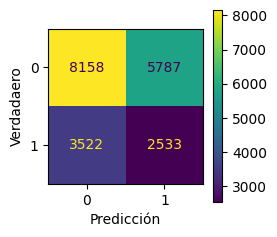

In [ ]:
fig , ax = plt.subplots(figsize = (2.5, 2.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax)
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadaero")
plt.show()